# Goal

Goal is to find a mechanism to search for under-valued stock to invest in.

Need to find indicators for good stock by examining historical data.

- [0. Data Processing](#section_0)
- [1. Analysis](#section_1)
    - [1.1 End_of_day_open_trading](#section_1_1)
    - [1.2 Calculating fundamental Value](#section_1_2)
    - [1.3 Predicting Forward Eps and Price Change](#section_1_3)
        - [1.3.0 Calculating trends and accelerations in cashflow generation](#section_1_3_0)
- [2. Cashflow_forecaster](#section_2)

# Glossary

- ebit: earnings before interest and taxes
- 

<a id='section_0'></a>
# Data Collection

Fetching the stocks from yahoo finance using the yfinance API

Fetching the stocks from yahoo finance using the yfinance API

In [2]:
!pip install yfinance

  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=0f9b010afd92cbccc9a547c9dd0c41d20552266c99703ae6a1b33e716067ae20
  Stored in directory: c:\users\cemly\appdata\local\pip\cache\wheels\f2\b5\2c\59ba95dcf854e542944c75fe3da584e4e3833b319735a0546c
Successfully built multitasking


In [6]:
import pandas as pd
from tqdm import tqdm

from concurrent.futures import ThreadPoolExecutor
import yfinance as yf
from pprint import pprint
from time import monotonic

In [7]:
# Getting list of stonks which are available on trade-212. CSV sourced from reddit.
stonks = pd.read_csv('Trading212-INVEST.csv')['ticker'].values.tolist()
len(stonks)

5196

In [8]:
def get_ticker(index):
    
    try:  
        ticker = yf.Ticker(index)

        info = ticker.get_info()

        if ticker.get_info()['regularMarketPrice'] is None:
            return None

        ticker_history = ticker.history(period='max')

        if len(ticker_history)==0:
            return None

        financials = ticker.financials.T
        balance_sheet = ticker.balance_sheet.T

        # Converting pandas dataframes to dicts as it seems to save in the pickle file better.
        data_dict = {f'{index}':{
                     'info':info,
                     'history':ticker_history.to_dict(),
                     'financials':financials.to_dict(),
                     'balance_sheet':balance_sheet.to_dict()}
                    }
        return data_dict
    except:
        data_dict = {f'{index}':'error'}
        return data_dict

In [9]:
import tqdm

tickers = list()
count=0
for stonk in tqdm.tqdm(stonks):
    count+=1
    tickers.append(get_ticker(stonk))
    #print(f'Count: {count}',end='\r')

 12%|█████████                                                                 | 640/5196 [1:55:23<13:54:01, 10.98s/it]

- DGE: No data found for this date range, symbol may be delisted


 13%|█████████▎                                                                | 655/5196 [1:58:14<14:17:33, 11.33s/it]

- DIVI: No data found for this date range, symbol may be delisted


 14%|██████████▍                                                               | 735/5196 [2:12:06<12:18:01,  9.93s/it]

- ELG: No data found for this date range, symbol may be delisted


 14%|██████████▌                                                               | 739/5196 [2:12:44<12:19:44,  9.96s/it]

- EMG: No data found for this date range, symbol may be delisted


 15%|███████████▍                                                              | 802/5196 [2:23:57<12:00:10,  9.83s/it]

- EVAL: No data found for this date range, symbol may be delisted


 19%|██████████████▏                                                           | 993/5196 [2:58:22<13:23:44, 11.47s/it]

- GOOS : No data found, symbol may be delisted


 23%|████████████████▉                                                        | 1204/5196 [3:33:27<11:41:51, 10.55s/it]

- IPF: No data found for this date range, symbol may be delisted


 24%|█████████████████▉                                                        | 1262/5196 [3:42:41<9:24:49,  8.61s/it]

- IXI: No data found for this date range, symbol may be delisted


 27%|███████████████████▋                                                     | 1398/5196 [4:06:40<10:06:51,  9.59s/it]

- LKOR : No data found, symbol may be delisted


 29%|█████████████████████▍                                                   | 1523/5196 [4:28:36<10:25:22, 10.22s/it]

- MNG: No data found for this date range, symbol may be delisted


 33%|████████████████████████▎                                                | 1731/5196 [5:07:59<10:28:14, 10.88s/it]

- PFV: No data found for this date range, symbol may be delisted


 34%|████████████████████████▉                                                 | 1748/5196 [5:10:50<9:53:01, 10.32s/it]

- PJS1: No data found for this date range, symbol may be delisted


 36%|██████████████████████████▋                                               | 1870/5196 [5:32:19<8:41:23,  9.41s/it]

- RKH: No data found for this date range, symbol may be delisted


 37%|███████████████████████████▎                                              | 1915/5196 [5:39:19<7:44:18,  8.49s/it]

- SAB: No data found for this date range, symbol may be delisted


 40%|█████████████████████████████▋                                            | 2083/5196 [6:08:23<9:26:25, 10.92s/it]

- SPY4: No data found for this date range, symbol may be delisted


 40%|█████████████████████████████▋                                            | 2084/5196 [6:08:32<8:54:30, 10.31s/it]

- SPY4: No data found for this date range, symbol may be delisted


 40%|█████████████████████████████▋                                            | 2085/5196 [6:08:41<8:38:46, 10.01s/it]

- SPYM: No data found for this date range, symbol may be delisted


 40%|█████████████████████████████▋                                            | 2086/5196 [6:08:51<8:28:37,  9.81s/it]

- SPYW: No data found for this date range, symbol may be delisted


 40%|█████████████████████████████▋                                            | 2087/5196 [6:09:00<8:20:26,  9.66s/it]

- SPYY: No data found for this date range, symbol may be delisted


 41%|██████████████████████████████                                            | 2114/5196 [6:13:37<8:19:12,  9.72s/it]

- STHS: No data found for this date range, symbol may be delisted


 41%|██████████████████████████████▏                                           | 2124/5196 [6:15:25<9:01:37, 10.58s/it]

- STU: No data found for this date range, symbol may be delisted


 42%|██████████████████████████████▊                                           | 2160/5196 [6:21:10<7:22:24,  8.74s/it]

- SYBA: No data found for this date range, symbol may be delisted


 42%|██████████████████████████████▊                                           | 2162/5196 [6:21:32<8:20:01,  9.89s/it]

- SYBY: No data found for this date range, symbol may be delisted


 44%|████████████████████████████████▉                                         | 2310/5196 [6:47:39<8:11:05, 10.21s/it]

- UKW: No data found for this date range, symbol may be delisted


 45%|█████████████████████████████████▍                                        | 2349/5196 [6:54:44<7:43:43,  9.77s/it]

- VDET: No data found for this date range, symbol may be delisted


 45%|█████████████████████████████████▍                                        | 2350/5196 [6:54:54<7:45:04,  9.80s/it]

- VDEV: No data found for this date range, symbol may be delisted


 45%|█████████████████████████████████▍                                        | 2351/5196 [6:55:04<7:48:19,  9.88s/it]

- VDNR: No data found for this date range, symbol may be delisted


 45%|█████████████████████████████████▍                                        | 2352/5196 [6:55:14<7:45:41,  9.82s/it]

- VDTY: No data found for this date range, symbol may be delisted


 45%|█████████████████████████████████▌                                        | 2357/5196 [6:56:03<8:08:57, 10.33s/it]

- VECP: No data found for this date range, symbol may be delisted


 45%|█████████████████████████████████▌                                        | 2358/5196 [6:56:13<8:04:16, 10.24s/it]

- VECP: No data found for this date range, symbol may be delisted


 46%|█████████████████████████████████▋                                        | 2365/5196 [6:57:27<8:25:38, 10.72s/it]

- VETY: No data found for this date range, symbol may be delisted


 46%|█████████████████████████████████▋                                        | 2367/5196 [6:57:45<7:52:38, 10.02s/it]

- VEVE: No data found for this date range, symbol may be delisted


 46%|█████████████████████████████████▊                                        | 2370/5196 [6:58:16<7:43:52,  9.85s/it]

- VFEM: No data found for this date range, symbol may be delisted


 46%|█████████████████████████████████▊                                        | 2375/5196 [6:59:04<7:49:12,  9.98s/it]

- VGOV: No data found for this date range, symbol may be delisted


 46%|██████████████████████████████████                                        | 2395/5196 [7:02:36<8:44:29, 11.24s/it]

- VMID: No data found for this date range, symbol may be delisted


 46%|██████████████████████████████████▏                                       | 2403/5196 [7:04:02<8:48:20, 11.35s/it]

- VNRT: No data found for this date range, symbol may be delisted


 46%|██████████████████████████████████▏                                       | 2404/5196 [7:04:11<8:20:05, 10.75s/it]

- VNRT: No data found for this date range, symbol may be delisted


 47%|██████████████████████████████████▌                                       | 2430/5196 [7:08:32<7:43:41, 10.06s/it]

- VUKE: No data found for this date range, symbol may be delisted


 47%|██████████████████████████████████▋                                       | 2432/5196 [7:08:47<6:58:27,  9.08s/it]

- VUSA: No data found for this date range, symbol may be delisted


 47%|██████████████████████████████████▋                                       | 2435/5196 [7:09:09<6:11:08,  8.07s/it]

- VUSD: No data found for this date range, symbol may be delisted


 47%|██████████████████████████████████▊                                       | 2443/5196 [7:10:21<7:04:53,  9.26s/it]

- VWRD: No data found for this date range, symbol may be delisted


 47%|██████████████████████████████████▊                                       | 2444/5196 [7:10:32<7:29:01,  9.79s/it]

- VWRL: No data found for this date range, symbol may be delisted


 47%|███████████████████████████████████                                       | 2462/5196 [7:13:28<7:15:01,  9.55s/it]

- WCOS: No data found for this date range, symbol may be delisted


 48%|███████████████████████████████████▏                                      | 2475/5196 [7:15:58<7:23:20,  9.78s/it]

- WHEA: No data found for this date range, symbol may be delisted


 48%|███████████████████████████████████▍                                      | 2488/5196 [7:18:07<7:33:50, 10.06s/it]

- WMH: No data found for this date range, symbol may be delisted


 48%|███████████████████████████████████▌                                      | 2495/5196 [7:19:27<8:36:13, 11.47s/it]

- WSML: No data found for this date range, symbol may be delisted


 49%|████████████████████████████████████▏                                     | 2544/5196 [7:27:09<8:22:19, 11.36s/it]

- XLVS: No data found for this date range, symbol may be delisted


 50%|████████████████████████████████████▉                                     | 2590/5196 [7:34:31<6:58:43,  9.64s/it]

- ZPDH: No data found for this date range, symbol may be delisted


 50%|████████████████████████████████████▉                                     | 2592/5196 [7:34:50<6:50:32,  9.46s/it]

- ZPRA: No data found for this date range, symbol may be delisted


 50%|████████████████████████████████████▉                                     | 2593/5196 [7:34:59<6:54:58,  9.57s/it]

- ZPRP: No data found for this date range, symbol may be delisted


 50%|████████████████████████████████████▉                                     | 2594/5196 [7:35:10<7:10:03,  9.92s/it]

- ZPRV: No data found for this date range, symbol may be delisted


 50%|████████████████████████████████████▉                                     | 2595/5196 [7:35:20<7:01:46,  9.73s/it]

- ZPRX: No data found for this date range, symbol may be delisted


 62%|██████████████████████████████████████████████                            | 3238/5196 [9:32:15<5:40:53, 10.45s/it]

- DGE: No data found for this date range, symbol may be delisted


 63%|██████████████████████████████████████████████▎                           | 3253/5196 [9:35:18<6:17:41, 11.66s/it]

- DIVI: No data found for this date range, symbol may be delisted


 64%|███████████████████████████████████████████████▍                          | 3333/5196 [9:49:12<5:09:41,  9.97s/it]

- ELG: No data found for this date range, symbol may be delisted


 64%|███████████████████████████████████████████████▌                          | 3337/5196 [9:49:46<4:47:22,  9.27s/it]

- EMG: No data found for this date range, symbol may be delisted


 65%|███████████████████████████████████████████████▊                         | 3400/5196 [10:00:58<4:37:24,  9.27s/it]

- EVAL: No data found for this date range, symbol may be delisted


 69%|██████████████████████████████████████████████████▍                      | 3591/5196 [10:35:16<5:04:08, 11.37s/it]

- GOOS : No data found, symbol may be delisted


 73%|█████████████████████████████████████████████████████▍                   | 3802/5196 [11:10:02<4:22:02, 11.28s/it]

- IPF: No data found for this date range, symbol may be delisted


 74%|██████████████████████████████████████████████████████▏                  | 3860/5196 [11:19:11<3:06:10,  8.36s/it]

- IXI: No data found for this date range, symbol may be delisted


 77%|████████████████████████████████████████████████████████▏                | 3996/5196 [11:43:03<3:17:35,  9.88s/it]

- LKOR : No data found, symbol may be delisted


 79%|█████████████████████████████████████████████████████████▉               | 4121/5196 [12:05:05<3:06:24, 10.40s/it]

- MNG: No data found for this date range, symbol may be delisted


 83%|████████████████████████████████████████████████████████████▊            | 4329/5196 [12:43:56<2:28:49, 10.30s/it]

- PFV: No data found for this date range, symbol may be delisted


 84%|█████████████████████████████████████████████████████████████            | 4346/5196 [12:46:51<2:29:54, 10.58s/it]

- PJS1: No data found for this date range, symbol may be delisted


 86%|██████████████████████████████████████████████████████████████▊          | 4468/5196 [13:08:03<1:53:05,  9.32s/it]

- RKH: No data found for this date range, symbol may be delisted


 87%|███████████████████████████████████████████████████████████████▍         | 4513/5196 [13:14:57<1:31:42,  8.06s/it]

- SAB: No data found for this date range, symbol may be delisted


 90%|█████████████████████████████████████████████████████████████████▊       | 4681/5196 [13:43:36<1:35:11, 11.09s/it]

- SPY4: No data found for this date range, symbol may be delisted


 90%|█████████████████████████████████████████████████████████████████▊       | 4682/5196 [13:43:45<1:27:33, 10.22s/it]

- SPY4: No data found for this date range, symbol may be delisted


 90%|█████████████████████████████████████████████████████████████████▊       | 4683/5196 [13:43:54<1:26:04, 10.07s/it]

- SPYM: No data found for this date range, symbol may be delisted


 90%|█████████████████████████████████████████████████████████████████▊       | 4684/5196 [13:44:04<1:26:01, 10.08s/it]

- SPYW: No data found for this date range, symbol may be delisted


 90%|█████████████████████████████████████████████████████████████████▊       | 4685/5196 [13:44:15<1:26:03, 10.10s/it]

- SPYY: No data found for this date range, symbol may be delisted


 91%|██████████████████████████████████████████████████████████████████▏      | 4712/5196 [13:48:47<1:18:26,  9.72s/it]

- STHS: No data found for this date range, symbol may be delisted


 91%|██████████████████████████████████████████████████████████████████▎      | 4722/5196 [13:50:36<1:24:25, 10.69s/it]

- STU: No data found for this date range, symbol may be delisted


 92%|████████████████████████████████████████████████████████████████████▋      | 4758/5196 [13:56:12<57:31,  7.88s/it]

- SYBA: No data found for this date range, symbol may be delisted


 92%|██████████████████████████████████████████████████████████████████▊      | 4760/5196 [13:56:34<1:06:58,  9.22s/it]

- SYBY: No data found for this date range, symbol may be delisted


 94%|██████████████████████████████████████████████████████████████████████▊    | 4908/5196 [14:22:46<47:17,  9.85s/it]

- UKW: No data found for this date range, symbol may be delisted


 95%|███████████████████████████████████████████████████████████████████████▍   | 4947/5196 [14:29:36<40:01,  9.64s/it]

- VDET: No data found for this date range, symbol may be delisted


 95%|███████████████████████████████████████████████████████████████████████▍   | 4948/5196 [14:29:45<38:34,  9.33s/it]

- VDEV: No data found for this date range, symbol may be delisted


 95%|███████████████████████████████████████████████████████████████████████▍   | 4949/5196 [14:29:54<39:01,  9.48s/it]

- VDNR: No data found for this date range, symbol may be delisted


 95%|███████████████████████████████████████████████████████████████████████▍   | 4950/5196 [14:30:03<38:21,  9.35s/it]

- VDTY: No data found for this date range, symbol may be delisted


 95%|███████████████████████████████████████████████████████████████████████▌   | 4955/5196 [14:30:52<40:14, 10.02s/it]

- VECP: No data found for this date range, symbol may be delisted


 95%|███████████████████████████████████████████████████████████████████████▌   | 4956/5196 [14:31:00<38:17,  9.57s/it]

- VECP: No data found for this date range, symbol may be delisted


 96%|███████████████████████████████████████████████████████████████████████▋   | 4963/5196 [14:32:13<42:19, 10.90s/it]

- VETY: No data found for this date range, symbol may be delisted


 96%|███████████████████████████████████████████████████████████████████████▋   | 4965/5196 [14:32:29<36:57,  9.60s/it]

- VEVE: No data found for this date range, symbol may be delisted


 96%|███████████████████████████████████████████████████████████████████████▋   | 4968/5196 [14:32:59<36:30,  9.61s/it]

- VFEM: No data found for this date range, symbol may be delisted


 96%|███████████████████████████████████████████████████████████████████████▊   | 4973/5196 [14:33:49<37:00,  9.96s/it]

- VGOV: No data found for this date range, symbol may be delisted


 96%|████████████████████████████████████████████████████████████████████████   | 4993/5196 [14:37:13<37:42, 11.14s/it]

- VMID: No data found for this date range, symbol may be delisted


 96%|████████████████████████████████████████████████████████████████████████▏  | 5001/5196 [14:38:36<36:28, 11.22s/it]

- VNRT: No data found for this date range, symbol may be delisted


 96%|████████████████████████████████████████████████████████████████████████▏  | 5002/5196 [14:38:46<34:15, 10.60s/it]

- VNRT: No data found for this date range, symbol may be delisted


 97%|████████████████████████████████████████████████████████████████████████▌  | 5028/5196 [14:43:03<27:54,  9.97s/it]

- VUKE: No data found for this date range, symbol may be delisted


 97%|████████████████████████████████████████████████████████████████████████▌  | 5030/5196 [14:43:20<25:52,  9.35s/it]

- VUSA: No data found for this date range, symbol may be delisted


 97%|████████████████████████████████████████████████████████████████████████▋  | 5033/5196 [14:43:44<23:35,  8.68s/it]

- VUSD: No data found for this date range, symbol may be delisted


 97%|████████████████████████████████████████████████████████████████████████▊  | 5041/5196 [14:45:22<25:52, 10.02s/it]

- VWRD: No data found for this date range, symbol may be delisted


 97%|████████████████████████████████████████████████████████████████████████▊  | 5042/5196 [14:45:31<25:39, 10.00s/it]

- VWRL: No data found for this date range, symbol may be delisted


 97%|█████████████████████████████████████████████████████████████████████████  | 5060/5196 [14:48:19<21:15,  9.38s/it]

- WCOS: No data found for this date range, symbol may be delisted


 98%|█████████████████████████████████████████████████████████████████████████▏ | 5073/5196 [14:50:48<20:29, 10.00s/it]

- WHEA: No data found for this date range, symbol may be delisted


 98%|█████████████████████████████████████████████████████████████████████████▍ | 5086/5196 [14:53:00<18:33, 10.13s/it]

- WMH: No data found for this date range, symbol may be delisted


 98%|█████████████████████████████████████████████████████████████████████████▌ | 5093/5196 [14:54:17<19:23, 11.29s/it]

- WSML: No data found for this date range, symbol may be delisted


 99%|██████████████████████████████████████████████████████████████████████████▏| 5142/5196 [15:02:13<10:31, 11.69s/it]

- XLVS: No data found for this date range, symbol may be delisted


100%|██████████████████████████████████████████████████████████████████████████▉| 5188/5196 [15:09:38<01:21, 10.17s/it]

- ZPDH: No data found for this date range, symbol may be delisted


100%|██████████████████████████████████████████████████████████████████████████▉| 5190/5196 [15:09:55<00:55,  9.31s/it]

- ZPRA: No data found for this date range, symbol may be delisted


100%|██████████████████████████████████████████████████████████████████████████▉| 5191/5196 [15:10:03<00:45,  9.11s/it]

- ZPRP: No data found for this date range, symbol may be delisted


100%|██████████████████████████████████████████████████████████████████████████▉| 5192/5196 [15:10:14<00:37,  9.48s/it]

- ZPRV: No data found for this date range, symbol may be delisted


100%|██████████████████████████████████████████████████████████████████████████▉| 5193/5196 [15:10:23<00:27,  9.32s/it]

- ZPRX: No data found for this date range, symbol may be delisted


100%|███████████████████████████████████████████████████████████████████████████| 5196/5196 [15:10:54<00:00, 10.52s/it]


In [10]:
# start_time = monotonic()
# # you can choose max_workers number higher and check if app works faster
# # e.g choose 16 as max number of workers
# with ThreadPoolExecutor(max_workers=4) as pool:
#     results = pool.map(get_ticker, stonks)

# print(monotonic() - start_time)
#tickers = [x for x in results]

In [11]:
len(tickers)

5196

In [12]:
nones = list()
for ticker in tickers:
    if ticker is None:
        nones.append(1)
    else:
        nones.append(0)

In [13]:
sum(nones)/len(tickers)

0.43687451886066203

In [14]:
import pickle

with open('ticker_files_15052022.pkl','wb') as file:
    pickle.dump(tickers,file)

In [21]:
y = [x for x in tickers if x is not None]

In [22]:
len(y)

2926

In [23]:
y[0]

{'A': {'info': {'zip': '95051',
   'sector': 'Healthcare',
   'fullTimeEmployees': 17200,
   'longBusinessSummary': "Agilent Technologies, Inc. provides application focused solutions to the life sciences, diagnostics, and applied chemical markets worldwide. The Life Sciences and Applied Markets segment offers liquid chromatography systems and components; liquid chromatography mass spectrometry systems; gas chromatography systems and components; gas chromatography mass spectrometry systems; inductively coupled plasma mass spectrometry instruments; atomic absorption instruments; microwave plasma-atomic emission spectrometry instruments; inductively coupled plasma optical emission spectrometry instruments; raman spectroscopy; cell analysis plate based assays; flow cytometer; real-time cell analyzer; cell imaging systems; microplate reader; laboratory software; information management and analytics; laboratory automation and robotic systems; dissolution testing; vacuum pumps, and measuremen

In [18]:
# with open('ticker_files.pkl','rb') as file:
#     tickers_read = pickle.load(file)

### Processing the data

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
from tqdm import tqdm
import pickle

In [24]:
with open('ticker_files_15052022.pkl','rb') as file:
    tickers_read = pickle.load(file)

In [25]:
data_dict = dict()
for val in tickers_read:
    if val is not None:
        data_dict.update(val)

In [26]:
len(tickers_read)

5196

In [27]:
len(data_dict)

1400

In [28]:
def process_ticker(info,ticker_history,financials,balance_sheet):
    
    ticker_history = pd.DataFrame.from_dict(ticker_history)
    financials = pd.DataFrame.from_dict(financials).T
    balance_sheet = pd.DataFrame.from_dict(balance_sheet).T
    
    ticker_history_bool = (len(ticker_history)>0)&(ticker_history.shape[1]>0)
    financials_bool = (len(financials)>0)&(financials.shape[1]>0)
    balance_sheet_bool = (len(balance_sheet)>0)&(balance_sheet.shape[1]>0)
    
    if any([ticker_history_bool,financials_bool,balance_sheet_bool]):
        return None
    else:
        today = pd.Timestamp('2021-03-31')
        origin = today - pd.Timedelta('90days')
        today_tm30 = today - pd.Timedelta('30days')
        origin_tm30 = origin  - pd.Timedelta('30days')
        #ticker = yf.Ticker(index)

        # Getting growth
        orig_price = ticker_history[(ticker_history.index>=origin_tm30)&(ticker_history.index<origin)]
        orig_index = orig_price.index.max()
        orig_price = orig_price.loc[[orig_index]]['Close']

        today_price = ticker_history[(ticker_history.index>=today_tm30)&(ticker_history.index<today)]
        today_index = today_price.index.max()
        today_price = today_price.loc[[today_index]]['Close']
        growth = (today_price[0]-orig_price[0])/orig_price[0]

        # Fetch nearest financials under the condition that the financial pre-date the stock prices
        origin_financials = financials[financials.index<=orig_index].sort_index().iloc[[-1]]
        origin_balance_sheet = balance_sheet[balance_sheet.index<=orig_index].sort_index().iloc[[-1]]


        origin_financials['growth'] = growth
        origin_financials['orig_price'] = orig_price[0]
        origin_financials['orig_date'] = orig_index
        origin_financials['outcome_date'] = today
        origin_financials['today_price'] = today_price[0]
        origin_financials['obsdate'] = origin
        origin_financials['stonk'] = index
        origin_financials['financials_date'] = origin_financials.index

        #origin_financials['orig_EPS'] = origin_financials['Net Income Applicable To Common Shares']/origin
        #origin_financials['orig_PE'] = 0

        #origin_financials = origin_financials.join(origin_balance_sheet)
        return origin_financials.join(origin_balance_sheet)

In [30]:
process_list = list()
funny_list = list()
for k,v in tqdm.tqdm(data_dict.items()):
    
    if isinstance(v,dict):
        process_list.append(process_ticker(v['info'],v['history'],v['financials'],v['balance_sheet']))
    else:
        funny_list.append(k)

100%|██████████████████████████████████████████████████████████████████████████████| 1400/1400 [02:09<00:00, 10.84it/s]


In [31]:
process_ticker(data_dict['A']['info'],
               data_dict['A']['history'],
               data_dict['A']['financials'],data_dict['A']['balance_sheet'])

In [32]:
data_dict['A']['history']

{'Open': {Timestamp('1999-11-18 00:00:00'): 27.989304835610387,
  Timestamp('1999-11-19 00:00:00'): 26.41298101677938,
  Timestamp('1999-11-22 00:00:00'): 25.413366480975252,
  Timestamp('1999-11-23 00:00:00'): 26.14385376691568,
  Timestamp('1999-11-24 00:00:00'): 24.682870388292653,
  Timestamp('1999-11-26 00:00:00'): 25.14423731733008,
  Timestamp('1999-11-29 00:00:00'): 25.22113326718432,
  Timestamp('1999-11-30 00:00:00'): 25.836278904740297,
  Timestamp('1999-12-01 00:00:00'): 25.95161953520625,
  Timestamp('1999-12-02 00:00:00'): 26.912790020835125,
  Timestamp('1999-12-03 00:00:00'): 27.643280127907914,
  Timestamp('1999-12-06 00:00:00'): 27.835515771267083,
  Timestamp('1999-12-07 00:00:00'): 28.143089480304656,
  Timestamp('1999-12-08 00:00:00'): 27.835513891290802,
  Timestamp('1999-12-09 00:00:00'): 27.835513532328807,
  Timestamp('1999-12-10 00:00:00'): 28.104637618783116,
  Timestamp('1999-12-13 00:00:00'): 27.989301681518555,
  Timestamp('1999-12-14 00:00:00'): 27.912406

In [33]:
data_dict['AAPL']

{'info': {'zip': '95014',
  'sector': 'Technology',
  'fullTimeEmployees': 154000,
  'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening ex

In [34]:
data_dict['AAPL']['info']['forwardPE']

23.804209

In [35]:
data_dict['AAPL']['info']['trailingPE']

26.222816

In [36]:
data_dict['AAPL']['info']['forwardEps']

6.18

In [37]:
data_dict['AAPL']['info']['revenuePerShare']

21.904

In [38]:
'floatShares','marketCap'

('floatShares', 'marketCap')

In [39]:
data_dict['AAPL']['info']['netIncomeToCommon']/data_dict['AAPL']['info']['floatShares']

5.776811975745096

In [40]:
data_dict['AAPL']['info']['grossProfits']/data_dict['AAPL']['info']['floatShares']

9.325146276387855

In [41]:
data_dict['AAPL']['info']['freeCashflow']/data_dict['AAPL']['info']['floatShares']

4.472026422740594

In [42]:
data_dict['AAPL']['info']['totalCashPerShare']

3.818

In [43]:
data_dict['AAPL']['info']['totalCash']/data_dict['AAPL']['info']['floatShares']

3.8218603766579395

In [44]:
#data_dict['AA']['financials']

In [45]:
pd.DataFrame(data_dict['AA']['history'])

,Open,High,Low,Close,Volume,Dividends,Stock Splits
1962-01-02,0.000000,1.550548,1.541704,1.541704,55930,0.0,0.0
1962-01-03,1.541703,1.565285,1.538755,1.565285,74906,0.0,0.0
1962-01-04,1.565285,1.577076,1.565285,1.565285,80899,0.0,0.0
1962-01-05,1.565284,1.574128,1.559389,1.562337,70911,0.0,0.0
1962-01-08,1.556442,1.556442,1.497485,1.509277,93883,0.0,0.0
...,...,...,...,...,...,...,...
2022-05-09,58.500000,58.573002,53.730000,54.209999,12074900,0.0,0.0
2022-05-10,55.509998,56.910000,53.610001,55.840000,8497600,0.0,0.0
2022-05-11,57.459999,59.360001,56.270000,56.660000,6194300,0.0,0.0
2022-05-12,54.849998,56.360001,53.340000,54.580002,7408800,0.0,0.0


In [46]:
pd.DataFrame.from_dict(data_dict['AA']['history']['Open'],orient='index')

,0
1962-01-02,0.000000
1962-01-03,1.541703
1962-01-04,1.565285
1962-01-05,1.565284
1962-01-08,1.556442
...,...
2022-05-09,58.500000
2022-05-10,55.509998
2022-05-11,57.459999
2022-05-12,54.849998


In [47]:
import tqdm
df_list = list()
for ticker,ticker_data in tqdm.tqdm(data_dict.items()):
    df = pd.DataFrame(ticker_data['history'])
    df['ticker'] = ticker
    df_list.append(df)
df_all = pd.concat(df_list,axis=0)
df_all.head()

100%|██████████████████████████████████████████████████████████████████████████████| 1400/1400 [01:40<00:00, 13.97it/s]


,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker
1999-11-18,27.989305,30.757481,24.605983,27.066582,62546380.0,0.0,0.0,A
1999-11-19,26.412981,26.451429,24.490640,24.836662,15234146.0,0.0,0.0,A
1999-11-22,25.413366,27.066582,24.644429,27.066582,6577870.0,0.0,0.0,A
1999-11-23,26.143854,26.835898,24.605980,24.605980,5975611.0,0.0,0.0,A
1999-11-24,24.682870,25.797829,24.605976,25.259573,4843231.0,0.0,0.0,A


In [50]:
len(df_all.ticker.unique())

1400

In [100]:
df_all.to_pickle('df_all_15052022.pkl')

In [113]:
# Putting the financials in
import tqdm
financials_dfs = list()
for ticker,data in tqdm.tqdm(data_dict.items()):
    financials_df = pd.DataFrame(data_dict[ticker]['financials']).sort_index().reset_index().rename(columns={'index':'quarter'})
    financials_df['ticker'] = ticker
    financials_dfs.append(financials_df)
financials = pd.concat(financials_dfs,axis=0).set_index('ticker').join(rps[['floatShares']],how='inner')
financials.head()

100%|█████████████████████████████████████████████████████████████████████████████| 1400/1400 [00:02<00:00, 525.62it/s]


,quarter,Research Development,Effect Of Accounting Charges,Income Before Tax,Minority Interest,Net Income,Selling General Administrative,Gross Profit,Ebit,Operating Income,...,Other Items,Income Tax Expense,Total Revenue,Total Operating Expenses,Cost Of Revenue,Total Other Income Expense Net,Discontinued Operations,Net Income From Continuing Ops,Net Income Applicable To Common Shares,floatShares
ticker,,,,,,,,,,,,,,,,,,,,,
A,2018-10-31,387000000.0,None,9.460000e+08,4.000000e+06,3.160000e+08,1.322000e+09,2.680000e+09,9.710000e+08,9.710000e+08,...,None,630000000.0,4.914000e+09,3.943000e+09,2.234000e+09,-25000000.0,NaN,3.160000e+08,3.160000e+08,301140095.0
A,2019-10-31,404000000.0,None,9.190000e+08,NaN,1.071000e+09,1.358000e+09,2.805000e+09,1.043000e+09,1.043000e+09,...,None,-152000000.0,5.163000e+09,4.120000e+09,2.358000e+09,-124000000.0,NaN,1.071000e+09,1.071000e+09,301140095.0
A,2020-10-31,397000000.0,None,8.420000e+08,NaN,7.190000e+08,1.395000e+09,2.837000e+09,1.045000e+09,1.045000e+09,...,None,123000000.0,5.339000e+09,4.294000e+09,2.502000e+09,-203000000.0,NaN,7.190000e+08,7.190000e+08,301140095.0
A,2021-10-31,441000000.0,None,1.360000e+09,NaN,1.210000e+09,1.562000e+09,3.407000e+09,1.404000e+09,1.404000e+09,...,None,150000000.0,6.319000e+09,4.915000e+09,2.912000e+09,-44000000.0,NaN,1.210000e+09,1.210000e+09,301140095.0
AA,2018-12-31,31000000.0,None,1.625000e+09,1.970000e+09,2.500000e+08,3.870000e+08,3.353000e+09,2.077000e+09,2.077000e+09,...,None,732000000.0,1.340300e+10,1.132600e+10,1.005000e+10,-452000000.0,NaN,8.930000e+08,2.500000e+08,184411126.0


In [114]:
financials.to_pickle('financials_15052022.pkl')

In [118]:
from collections import defaultdict
fund_val = defaultdict(list)

def get_value(key,data_dict):
    if key in data_dict:
        return data_dict[key]
    else:
        return np.nan
    
data_points = ['circulatingSupply',
    'floatShares',
               'grossProfits',
    'shortName',
               'sector',
    'sharesOutstanding',
    'totalCashPerShare',
    'sharesShort',
    'shortRatio', 
    'sharesShortPreviousMonthDate',
    'marketCap',
    'revenuePerShare',
    'currentPrice']

data_points = [x for x in data_dict['BABA']['info'].keys()]

for ticker,ticker_data in data_dict.items():
        
    fund_val['ticker'].append(ticker)
    for col in data_points:
        fund_val[col].append(get_value(col,ticker_data['info']))
pd.DataFrame(fund_val).to_pickle('information_15052022.pkl')

In [93]:
def calc_diff(date1,date2,df):
    precovid = df_all.loc[date1]
    now = df_all.loc[date2]
    compare = pd.concat([precovid,now],axis=0)
    compare1 = compare.reset_index().set_index(['ticker','index'])[['Close']].unstack(1)
    compare1.columns=  ['old','new']
    compare1['perc_diff'] = compare1['new']/compare1['old']-1
    compare1 = compare1.dropna(axis=0)
    return compare1

In [59]:
precovid = df_all.loc['2020-01-02']

In [60]:
now = df_all.loc['2022-05-02']

In [63]:
compare = pd.concat([precovid,now],axis=0)
compare.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker
2020-01-02,84.750349,85.194323,84.059713,84.799675,1410500.0,0.0,0.0,A
2020-01-02,21.812365,21.812365,21.268553,21.373323,3062500.0,0.0,0.0,AA
2020-01-02,28.873297,29.192119,28.544513,28.982893,6451100.0,0.0,0.0,AAL
2020-01-02,12.130000,12.530000,11.800000,12.500000,885000.0,0.0,0.0,AAOI
2020-01-02,156.512125,156.980282,153.644636,155.478271,944900.0,0.0,0.0,AAP


In [77]:
compare1 = compare.reset_index().set_index(['ticker','index'])[['Close']].unstack(1)
compare1.columns=  ['old','new']
compare1['perc_diff'] = compare1['new']/compare1['old']-1
print(compare1.shape)
compare1 = compare1.dropna(axis=0)
print(compare1.shape)
compare1.head(20)

(1394, 3)
(1330, 3)


,old,new,perc_diff
ticker,,,
A,84.799675,119.570000,0.410029
AA,21.373323,66.160004,2.095448
AAL,28.982893,18.559999,-0.359622
AAOI,12.500000,2.590000,-0.792800
AAP,155.478271,200.490005,0.289505
AAPL,74.207466,157.960007,1.128627
ABBV,80.137360,147.869995,0.845207
ABC,82.064140,148.970001,0.815287
ABCB,41.471180,42.990002,0.036624


<AxesSubplot:>

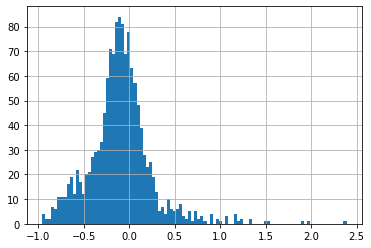

In [97]:
peak_to_now = calc_diff('2021-07-30','2022-05-02',df_all)
peak_to_now[peak_to_now['perc_diff']<10]['perc_diff'].hist(bins=100)

<AxesSubplot:>

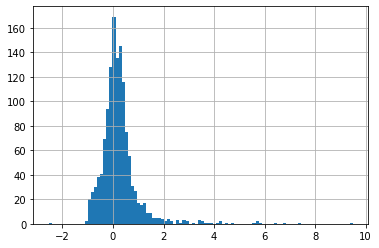

In [98]:
compare1[compare1['perc_diff']<10]['perc_diff'].hist(bins=100)

In [99]:
compare1[(compare1.perc_diff<0.5)&(compare1.perc_diff>-0.5)].index.tolist()

['A',
 'AAL',
 'AAP',
 'ABCB',
 'ABT',
 'AC',
 'ACA',
 'ACCO',
 'ACGL',
 'ACIW',
 'ACN',
 'ADBE',
 'ADC',
 'ADES',
 'ADI',
 'ADP',
 'ADS',
 'ADSK',
 'ADUS',
 'ADV',
 'AEE',
 'AEIS',
 'AEM',
 'AEP',
 'AER',
 'AES',
 'AFL',
 'AG',
 'AGNC',
 'AGR',
 'AGT',
 'AGX',
 'AGYS',
 'AIG',
 'AIR',
 'AIRG',
 'AIZ',
 'AJX',
 'AKAM',
 'AL',
 'ALC',
 'ALE',
 'ALEC',
 'ALEX',
 'ALG',
 'ALGN',
 'ALL',
 'ALLE',
 'ALRM',
 'ALV',
 'AMBA',
 'AME',
 'AMED',
 'AMGN',
 'AMKR',
 'AMLP',
 'AMN',
 'AMRX',
 'AMS',
 'AMSWA',
 'AMT',
 'AMZN',
 'ANSS',
 'AON',
 'AOS',
 'APAM',
 'APD',
 'APH',
 'APPF',
 'APPN',
 'APRN',
 'APTV',
 'ARCO',
 'ARI',
 'ARL',
 'AROC',
 'ARW',
 'ASB',
 'ASC',
 'ASM',
 'ASUR',
 'ASYS',
 'ATGE',
 'ATO',
 'ATVI',
 'AU',
 'AUTO',
 'AUY',
 'AVA',
 'AVAV',
 'AVB',
 'AVNS',
 'AVT',
 'AVY',
 'AWR',
 'AWRE',
 'AXP',
 'AXS',
 'AXTI',
 'AYX',
 'AZN',
 'AZPN',
 'BAB',
 'BAC',
 'BAM',
 'BANF',
 'BANR',
 'BAP',
 'BATT',
 'BAX',
 'BB',
 'BBBY',
 'BBDC',
 'BBSI',
 'BBVA',
 'BBY',
 'BC',
 'BCOR',
 'BCOV',
 '

<a id='section_1'></a>
# 1.0 Analysis

<a id='section_1_1'></a>
## 1.1 Buying the end of day dip

In [19]:
df_all.ticker.nunique()

1442

In [20]:
df_all = df_all.reset_index().rename(columns={'index':'datetime'}).sort_values(by=['ticker','datetime'])

In [21]:
df_all['daily_change'] = df_all['Close']/df_all['Open']

(0.75, 1.25)

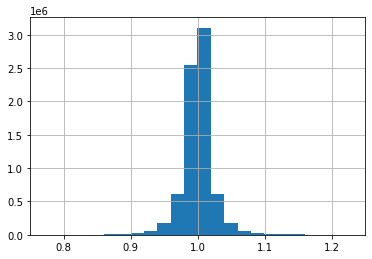

In [22]:
from matplotlib import pyplot as plt
df_all['daily_change'][df_all['daily_change']<2.0].replace(np.inf,np.nan).dropna().hist(bins=100)
#plt.yscale('log')
plt.xlim(0.75,1.25)

In [23]:
df_all[5480:5490]

,datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker,daily_change
5480,2021-09-01,175.039993,175.740005,174.380005,175.449997,142900000.0,0.0,0.0,A,1.002342
5481,2021-09-02,176.449997,178.339996,175.699997,178.020004,119400000.0,0.0,0.0,A,1.008898
5482,2021-09-03,177.669998,179.570007,177.029999,179.279999,971760.0,0.0,0.0,A,1.009062
5483,1962-01-02,1.536658,1.542310,1.536658,1.536658,55900.0,0.0,0.0,AA,1.000000
5484,1962-01-03,1.536658,1.560212,1.534774,1.560212,74500.0,0.0,0.0,AA,1.015328
5485,1962-01-04,1.560212,1.567749,1.560212,1.560212,80500.0,0.0,0.0,AA,1.000000
5486,1962-01-05,1.560211,1.565864,1.556442,1.558326,70500.0,0.0,0.0,AA,0.998792
5487,1962-01-08,1.554558,1.554558,1.491434,1.507450,93800.0,0.0,0.0,AA,0.969697
5488,1962-01-09,1.507450,1.531004,1.495202,1.495202,64500.0,0.0,0.0,AA,0.991875
5489,1962-01-10,1.495203,1.507451,1.491434,1.497087,34500.0,0.0,0.0,AA,1.001260


In [24]:
df_all['prev_daily_change'] = df_all.groupby('ticker')['daily_change'].shift(1)

<AxesSubplot:xlabel='prev_daily_change', ylabel='daily_change'>

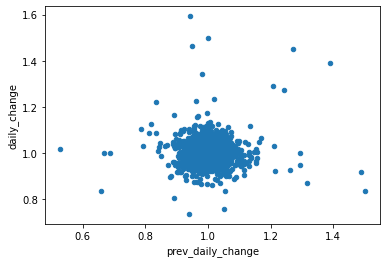

In [25]:
df_all[(df_all['prev_daily_change']<2.0)&\
       (df_all['daily_change']<2.0)&\
       (df_all.datetime>'2021-01-01')].sample(10000).plot.scatter(x='prev_daily_change',y='daily_change')

In [26]:
df_all[(df_all['prev_daily_change']<0.9)&\
       (df_all['daily_change']<2.0)&\
       (df_all.datetime>'2021-01-01')].corr()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_change,prev_daily_change
Open,1.000000,0.998177,0.996974,0.995788,0.027572,0.001429,-0.012485,-0.004002,0.094138
High,0.998177,1.000000,0.996325,0.997731,0.027024,0.001234,-0.012382,0.009225,0.091420
Low,0.996974,0.996325,1.000000,0.998431,0.027676,0.001545,-0.012419,0.010109,0.101413
Close,0.995788,0.997731,0.998431,1.000000,0.027857,0.000831,-0.012015,0.021684,0.097542
Volume,0.027572,0.027024,0.027676,0.027857,1.000000,-0.004061,-0.005430,0.026154,0.002985
Dividends,0.001429,0.001234,0.001545,0.000831,-0.004061,1.000000,-0.001769,-0.010945,0.012291
Stock Splits,-0.012485,-0.012382,-0.012419,-0.012015,-0.005430,-0.001769,1.000000,0.036918,0.019020
daily_change,-0.004002,0.009225,0.010109,0.021684,0.026154,-0.010945,0.036918,1.000000,0.063731
prev_daily_change,0.094138,0.091420,0.101413,0.097542,0.002985,0.012291,0.019020,0.063731,1.000000


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:55<00:00,  1.15s/it]


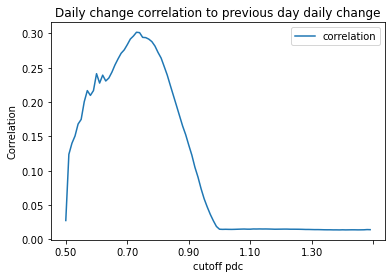

In [28]:
correlation_dict = dict()
for i in tqdm.tqdm(np.arange(0.5,1.5,0.01)):
    df_corr = df_all[(df_all['prev_daily_change']<i)&\
       (df_all['daily_change']<2.0)#&(df_all.datetime>'2021-01-01')
                    ].corr()
    correlation_dict[f'{i:0.2f}'] = df_corr.loc['daily_change','prev_daily_change']
pd.DataFrame(correlation_dict,
            index=['correlation']).T.reset_index().rename(columns={'index':'cutoff pdc'}).plot(x='cutoff pdc',y='correlation')
plt.ylabel('Correlation')
plt.title('Daily change correlation to previous day daily change')
plt.show()

In [ ]:
correlation_dict = dict()
for i in tqdm.tqdm(np.arange(0.5,1.5,0.01)):
    df_corr = df_all[(df_all['prev_daily_change']<i)&\
       (df_all['daily_change']<2.0)&(df_all.datetime>'2020-01-01')
                    ].corr()
    correlation_dict[f'{i:0.2f}'] = df_corr.loc['daily_change','prev_daily_change']
pd.DataFrame(correlation_dict,
            index=['correlation']).T.reset_index().rename(columns={'index':'cutoff pdc'}).plot(x='cutoff pdc',y='correlation')
plt.ylabel('Correlation')
plt.show()

In [ ]:
df_all['previous_day_Close_price'] = df_all.groupby('ticker')['Close'].shift()
df_all['close_open_pct'] = df_all['Open']/df_all['previous_day_Close_price']
df_all.head()

In [ ]:
df_all[(df_all.close_open_pct<6)].sample(10**4).plot.scatter(x='prev_daily_change',y='close_open_pct')

In [ ]:
import seaborn as sns; sns.set_theme(color_codes=True)
sns.regplot(x='prev_daily_change',
            y='close_open_pct',
            data=df_all[(df_all.close_open_pct<6)&(df_all.prev_daily_change<0.9)].sample(5*10**2,random_state=34).dropna(axis=0),fit_reg=True)
plt.title('Previous Day %change vs Next day opening price')
plt.show()

In [ ]:
correlation_dict = dict()
for i in tqdm.tqdm(np.arange(0.5,1.5,0.01)):
    df_corr = df_all[(df_all['prev_daily_change']<i)&\
       (df_all['close_open_pct']<6.0)
                    ].corr()
    correlation_dict[f'{i:0.2f}'] = df_corr.loc['close_open_pct','prev_daily_change']
pd.DataFrame(correlation_dict,
            index=['correlation']).T.reset_index().rename(columns={'index':'cutoff'}).plot(x='cutoff',y='correlation')
plt.ylabel('Correlation')
plt.show()

In [ ]:
import seaborn as sns; sns.set_theme(color_codes=True)
sns.regplot(x='prev_daily_change',
            y='close_open_pct',
            data=df_all[(df_all.close_open_pct<6)&(df_all.prev_daily_change<0.83)].sample(5*10**2,random_state=34).dropna(axis=0),fit_reg=True)
plt.title('Previous Day %change vs Next day opening price')
plt.show()

In [ ]:
correlation_dict = dict()
for i in tqdm.tqdm(np.arange(0.5,1.5,0.01)):
    df_corr = df_all[(df_all['prev_daily_change']<i)&\
       (df_all['close_open_pct']<6.0)&(df_all['datetime']>'2021-01-01')
                    ].corr()
    correlation_dict[f'{i:0.2f}'] = df_corr.loc['close_open_pct','prev_daily_change']
pd.DataFrame(correlation_dict,
            index=['correlation']).T.reset_index().rename(columns={'index':'cutoff pdc'}).plot(x='cutoff pdc',y='correlation')
plt.ylabel('Correlation')
plt.show()

In [ ]:
import seaborn as sns; sns.set_theme(color_codes=True)
sns.regplot(x='prev_daily_change',
            y='close_open_pct',
            data=df_all[(df_all.close_open_pct<6)&(df_all.prev_daily_change<0.9)&(df_all['datetime']>'2021-01-01')].sample(5*10**2,random_state=34).dropna(axis=0),fit_reg=True)
plt.title('Previous Day %change vs Next day opening price')
plt.show()

<a id='section_1_2'></a>
## 1.2 Calculating fundamental Value

Three ways to calculate fundamental value:
- discounted cashflow
- P/E ratios
- Asset based valuation

<AxesSubplot:>

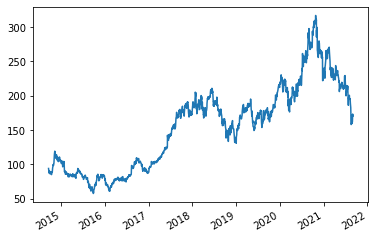

In [19]:
pd.DataFrame(data_dict['BABA']['history'])['Close'].plot()

<a id='section_1_2_1'></a>
### 1.2.1 Earning Per Share

Results show that the current price is highly correlated with the forward looking EPS, not the current EPS.

Other interesting variables are:
- forwardEps	0.70
- enterpriseValue	0.14
- heldPercentInstitutions	0.14
- shortPercentOfFloat	-0.12
- ebitdaMargins	0.11
- sharesPercentSharesOut	-0.11
- sharesShort	-0.10
- sharesShortPriorMonth	-0.10
- trailingEps	0.098
- shortRatio	-0.09
- totalCashPerShare	0.084
- freeCashflow	0.066
- returnOnEquity	0.058
- returnOnAssets	0.058
- revenuePerShare	0.054
- forwardPE	0.043
- operatingCashflow	0.04

Interesting things also:
- technology sector prices aren't as correlated to forwardEps compared to other sectors


In [14]:
from collections import defaultdict
fund_val = defaultdict(list)

def get_value(key,data_dict):
    if key in data_dict:
        return data_dict[key]
    else:
        return np.nan
    
data_points = ['circulatingSupply',
    'floatShares',
               'grossProfits',
    'shortName',
               'sector',
    'sharesOutstanding',
    'totalCashPerShare',
    'sharesShort',
    'shortRatio', 
    'sharesShortPreviousMonthDate',
    'marketCap',
    'revenuePerShare',
    'currentPrice']

data_points = [x for x in data_dict['BABA']['info'].keys()]

for ticker,ticker_data in data_dict.items():
        
    fund_val['ticker'].append(ticker)
    for col in data_points:
        fund_val[col].append(get_value(col,ticker_data['info']))

rps = pd.DataFrame(fund_val).set_index('ticker')
rps['revenue_per_share_price_ratio'] = rps['revenuePerShare']/rps['currentPrice']
rps['grossProfits_per_share_price_ratio'] = (rps['grossProfits']/rps['sharesOutstanding'])/rps['currentPrice']
rps.head()

,zip,sector,fullTimeEmployees,longBusinessSummary,city,phone,country,companyOfficers,website,maxAge,...,fiftyTwoWeekLow,bid,tradeable,dividendYield,bidSize,dayHigh,regularMarketPrice,logo_url,revenue_per_share_price_ratio,grossProfits_per_share_price_ratio
ticker,,,,,,,,,,,,,,,,,,,,,
A,95051,Healthcare,16400.0,"Agilent Technologies, Inc. provides applicatio...",Santa Clara,800 227 9770,United States,[],http://www.agilent.com,1,...,94.76,0.00,False,0.0045,800.0,179.5700,179.28,https://logo.clearbit.com/agilent.com,0.111959,0.051935
AA,15212-5858,Basic Materials,12900.0,"Alcoa Corporation, together with its subsidiar...",Pittsburgh,412-315-2900,United States,[],http://www.alcoa.com,1,...,10.98,0.00,False,NaN,800.0,47.7180,47.21,https://logo.clearbit.com/alcoa.com,1.191209,0.154504
AAL,76155,Industrials,113200.0,"American Airlines Group Inc., through its subs...",Fort Worth,817 963 1234,United States,[],http://www.aa.com,1,...,10.63,0.00,False,NaN,2900.0,19.9299,19.37,https://logo.clearbit.com/aa.com,1.235519,-0.445604
AAN,30339-3194,Consumer Cyclical,9400.0,The Aarons Company Inc. provides lease-to-own ...,Atlanta,678 402 3000,United States,[],http://www.aarons.com,1,...,16.20,26.45,False,0.0120,800.0,26.8600,26.85,https://logo.clearbit.com/aarons.com,1.954302,1.123079
AAOI,77478,Technology,2682.0,"Applied Optoelectronics, Inc. designs, manufac...",Sugar Land,281 295 1800,United States,[],http://www.ao-inc.com,1,...,6.39,0.00,False,NaN,1000.0,7.9200,7.72,https://logo.clearbit.com/ao-inc.com,1.210233,0.243717


In [15]:
rps.reset_index().rename(columns={'index':'ticker'}).to_csv('info.csv')

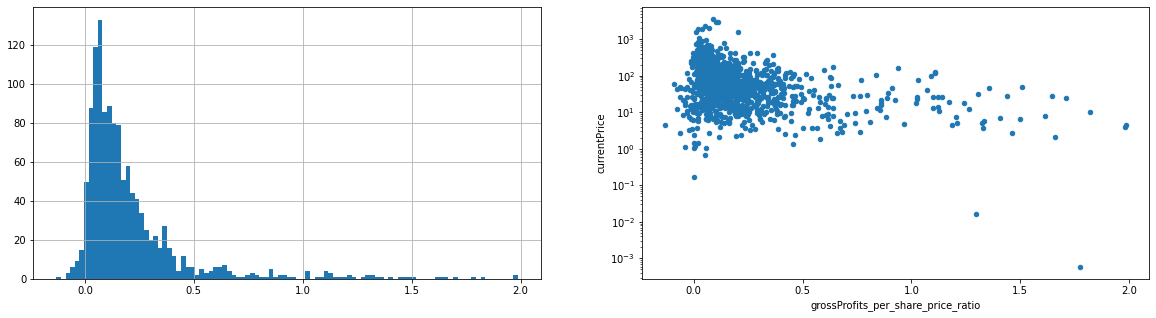

In [16]:
from matplotlib import pyplot as plt

fig,axes = plt.subplots(1,2,figsize=[20,5])
rps[(rps.grossProfits_per_share_price_ratio>-0.15)&\
    (rps.grossProfits_per_share_price_ratio<2)].grossProfits_per_share_price_ratio.replace(np.inf,
                                                                                    np.nan).hist(bins=100,ax=axes[0])

rps[(rps.grossProfits_per_share_price_ratio>-0.15)&\
    (rps.grossProfits_per_share_price_ratio<2)].plot.scatter(x='grossProfits_per_share_price_ratio',
                                         y='currentPrice',ax=axes[1])
axes[1].set_yscale('log')
#plt.yscale('log')

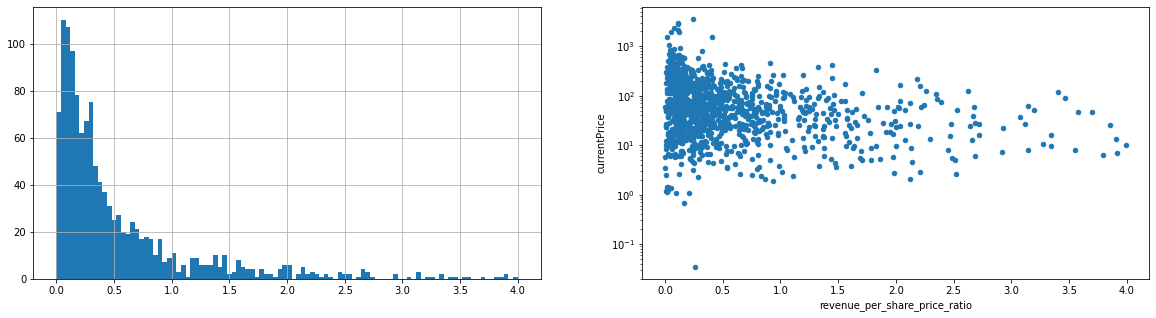

In [17]:
from matplotlib import pyplot as plt

fig,axes = plt.subplots(1,2,figsize=[20,5])
rps[(rps.revenue_per_share_price_ratio>0)&\
    (rps.revenue_per_share_price_ratio<4)].revenue_per_share_price_ratio.replace(np.inf,np.nan).hist(bins=100,
                                                                                                     ax=axes[0])

rps[(rps.revenue_per_share_price_ratio>0)&\
    (rps.revenue_per_share_price_ratio<4)].plot.scatter(x='revenue_per_share_price_ratio',
                                         y='currentPrice',ax=axes[1])
axes[1].set_yscale('log')
#plt.yscale('log')

<AxesSubplot:xlabel='forwardEps', ylabel='currentPrice'>

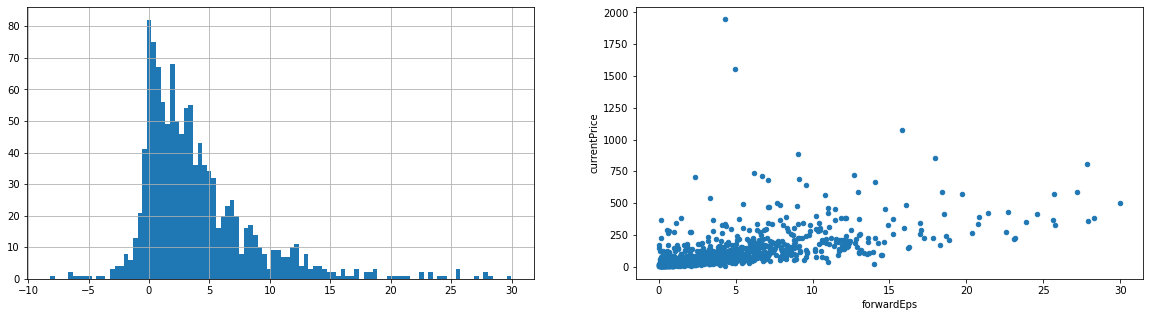

In [18]:
from matplotlib import pyplot as plt

fig,axes = plt.subplots(1,2,figsize=[20,5])
rps[(rps.forwardEps>-10)&\
    (rps.forwardEps<30)].forwardEps.replace(np.inf,np.nan).hist(bins=100,ax=axes[0])

rps[(rps.forwardEps>0)&\
    (rps.forwardEps<30)].plot.scatter(x='forwardEps',
                                         y='currentPrice',ax=axes[1])
#axes[1].set_yscale('log')
#plt.yscale('log')

<AxesSubplot:xlabel='forwardPE', ylabel='currentPrice'>

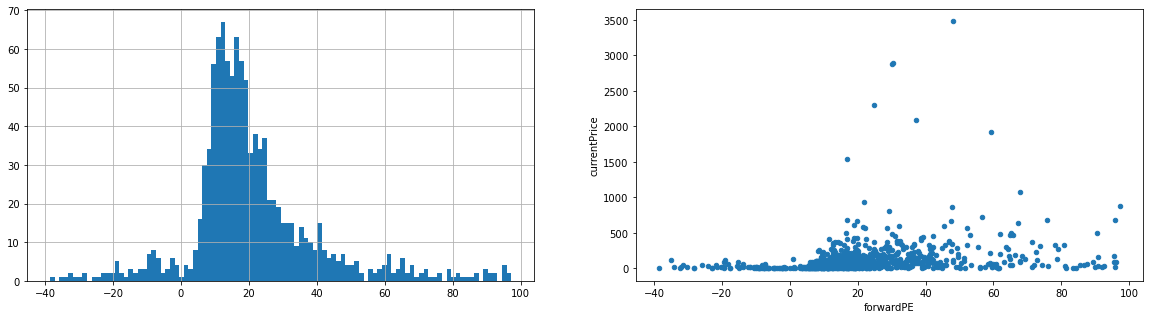

In [19]:
from matplotlib import pyplot as plt

fig,axes = plt.subplots(1,2,figsize=[20,5])
rps[(rps.forwardPE>-40)&\
    (rps.forwardPE<100)].forwardPE.replace(np.inf,np.nan).hist(bins=100,ax=axes[0])

rps[(rps.forwardPE>-40)&\
    (rps.forwardPE<100)].plot.scatter(x='forwardPE',
                                         y='currentPrice',ax=axes[1])

In [20]:
rps[rps.currentPrice>1500][['currentPrice','longName','forwardEps','forwardPE']]

,currentPrice,longName,forwardEps,forwardPE
ticker,,,,
AMZN,3478.05,"Amazon.com, Inc.",72.27,48.125782
AZO,1537.25,"AutoZone, Inc.",91.38,16.822609
BKNG,2304.45,Booking Holdings Inc.,92.62,24.880693
CABO,2085.43,"Cable One, Inc.",56.18,37.120502
CMG,1920.01,"Chipotle Mexican Grill, Inc.",32.43,59.204750
GOOG,2895.50,Alphabet Inc.,95.21,30.411722
GOOGL,2874.79,Alphabet Inc.,95.09,30.232307
MELI,1946.01,"MercadoLibre, Inc.",4.30,452.560460
SHOP,1554.25,Shopify Inc.,4.99,311.472960


'Consumer Cyclical' and 'healthcare' aren't as correlated based on revenue and cash per share.

In [21]:
pd.set_option('display.max_rows', 15)
def calc_corr(df,column,var):
    corr_dict = dict()
    for group in df[column].unique():
        corr_dict[group] = df[df[column]==group][[var,'currentPrice']].corr().loc[var,'currentPrice']
    df_cor = pd.DataFrame(corr_dict,index=['corr']).T
    df_cor['abs_corr'] = np.abs(df_cor['corr'])
    
    x = df[column].value_counts().to_frame(name='no_obs').reset_index()
    return df_cor.dropna().sort_values(by=['abs_corr'],ascending=False).reset_index().merge(x,on='index')

calc_corr(rps,'sector','forwardPE')

,index,corr,abs_corr,no_obs
0,Financial Services,0.337976,0.337976,154
1,Healthcare,0.112471,0.112471,160
2,Real Estate,0.108590,0.108590,87
3,Utilities,-0.103885,0.103885,42
4,Consumer Defensive,0.102202,0.102202,55
5,Consumer Cyclical,0.074118,0.074118,142
6,Industrials,-0.066317,0.066317,163
7,Technology,0.055383,0.055383,287
8,Energy,-0.041593,0.041593,73
9,Basic Materials,0.038027,0.038027,54


In [22]:
pd.set_option('display.max_rows', 15)
def calc_corr(df,column,var):
    corr_dict = dict()
    for group in df[column].unique():
        corr_dict[group] = df[df[column]==group][[var,'currentPrice']].corr().loc[var,'currentPrice']
    df_cor = pd.DataFrame(corr_dict,index=['corr']).T
    df_cor['abs_corr'] = np.abs(df_cor['corr'])
    
    x = df[column].value_counts().to_frame(name='no_obs').reset_index()
    return df_cor.dropna().sort_values(by=['abs_corr'],ascending=False).reset_index().merge(x,on='index')

calc_corr(rps,'sector','revenue_per_share_price_ratio')

,index,corr,abs_corr,no_obs
0,Financial,-1.000000,1.000000,2
1,Utilities,-0.458167,0.458167,42
2,Real Estate,-0.174973,0.174973,87
3,Financial Services,-0.173190,0.173190,154
4,Communication Services,-0.155848,0.155848,83
5,Energy,-0.154943,0.154943,73
6,Technology,-0.145692,0.145692,287
7,Basic Materials,-0.145267,0.145267,54
8,Industrials,-0.141020,0.141020,163
9,Consumer Defensive,-0.112782,0.112782,55


In [23]:
pd.set_option('display.max_rows', 15)
def calc_corr(df,column,var):
    corr_dict = dict()
    for group in df[column].unique():
        corr_dict[group] = df[df[column]==group][[var,'currentPrice']].corr().loc[var,'currentPrice']
    df_cor = pd.DataFrame(corr_dict,index=['corr']).T
    df_cor['abs_corr'] = np.abs(df_cor['corr'])
    
    x = df[column].value_counts().to_frame(name='no_obs').reset_index()
    return df_cor.dropna().sort_values(by=['abs_corr'],ascending=False).reset_index().merge(x,on='index')

calc_corr(rps,'sector','totalCashPerShare')

,index,corr,abs_corr,no_obs
0,Financial,-1.000000,1.000000,2
1,Healthcare,0.390506,0.390506,160
2,Communication Services,0.387936,0.387936,83
3,Technology,0.380101,0.380101,287
4,Utilities,0.305750,0.305750,42
5,Basic Materials,0.232917,0.232917,54
6,Financial Services,0.185022,0.185022,154
7,Real Estate,0.118401,0.118401,87
8,Industrials,0.084687,0.084687,163
9,Energy,0.045163,0.045163,73


In [24]:
pd.set_option('display.max_rows', 15)
def calc_corr(df,column,var):
    corr_dict = dict()
    for group in df[column].unique():
        corr_dict[group] = df[df[column]==group][[var,'currentPrice']].corr().loc[var,'currentPrice']
    df_cor = pd.DataFrame(corr_dict,index=['corr']).T
    df_cor['abs_corr'] = np.abs(df_cor['corr'])
    
    x = df[column].value_counts().to_frame(name='no_obs').reset_index()
    return df_cor.dropna().sort_values(by=['abs_corr'],ascending=False).reset_index().merge(x,on='index')

calc_corr(rps,'sector','forwardEps')

,index,corr,abs_corr,no_obs
0,Communication Services,0.979173,0.979173,83
1,Industrials,0.860029,0.860029,163
2,Financial Services,0.841163,0.841163,154
3,Energy,0.832742,0.832742,73
4,Utilities,0.808369,0.808369,42
5,Consumer Cyclical,0.798974,0.798974,142
6,Basic Materials,0.770147,0.770147,54
7,Consumer Defensive,0.752614,0.752614,55
8,Healthcare,0.666511,0.666511,160
9,Real Estate,0.641712,0.641712,87


In [25]:
rps[rps.sector=='Technology'][['longName']][:20]

,longName
ticker,
AAOI,"Applied Optoelectronics, Inc."
AAPL,Apple Inc.
ACIW,"ACI Worldwide, Inc."
ACLS,"Axcelis Technologies, Inc."
ACN,Accenture plc
...,...
AMD,"Advanced Micro Devices, Inc."
AMKR,"Amkor Technology, Inc."
AMSWA,"American Software, Inc."


In [26]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
rps['sector_enc'] = enc.fit_transform(rps['sector'].fillna('unknown').astype(str))

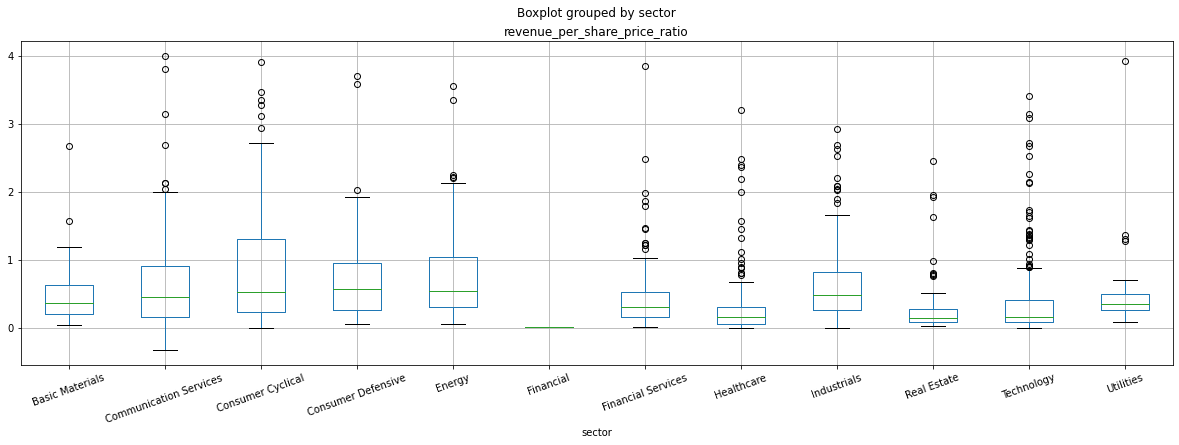

In [27]:
rps[(rps.revenue_per_share_price_ratio<4)&\
    (rps.revenue_per_share_price_ratio>-10)].boxplot(column='revenue_per_share_price_ratio',by='sector',figsize=[20,6])
plt.xticks(rotation=20)
plt.show()

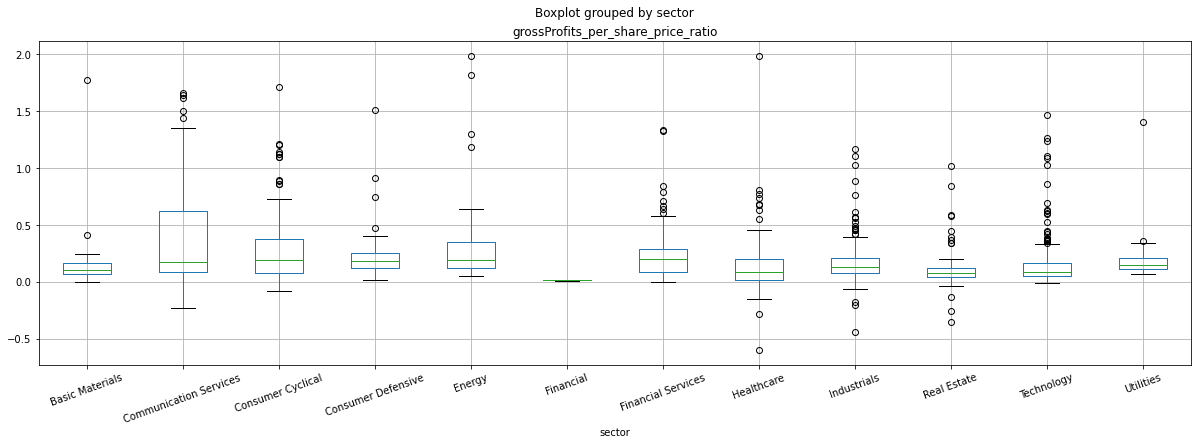

In [28]:
rps[(rps.grossProfits_per_share_price_ratio<2)&\
    (rps.grossProfits_per_share_price_ratio>-1)].boxplot(column='grossProfits_per_share_price_ratio',by='sector',figsize=[20,6])
plt.xticks(rotation=20)
#plt.yscale('log')
plt.show()

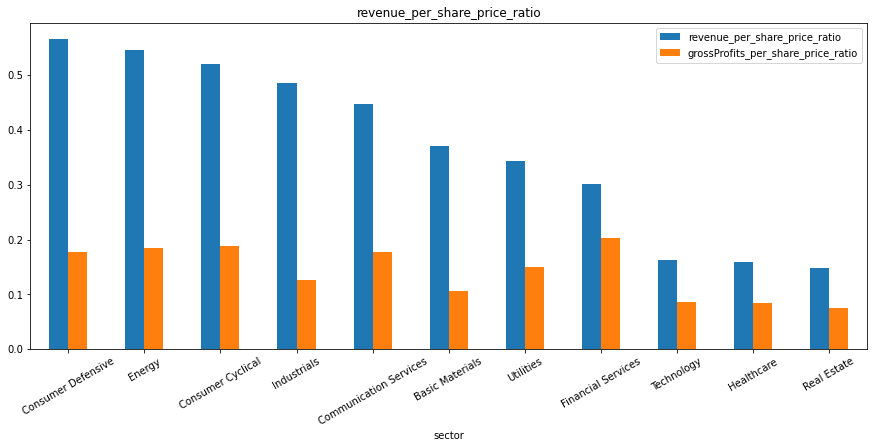

In [29]:
fig,axes = plt.subplots(1,1,figsize=[15,6])
rps[(rps.revenue_per_share_price_ratio<4)&\
    (rps.revenue_per_share_price_ratio>-10)].groupby('sector')[['revenue_per_share_price_ratio',
                                    'grossProfits_per_share_price_ratio']].median().sort_values(ascending=False,
    by='revenue_per_share_price_ratio').replace(np.inf,np.nan).dropna()[:-1].plot.bar(ax=axes)
axes.set_title('revenue_per_share_price_ratio')
plt.xticks(rotation=30)
plt.show()

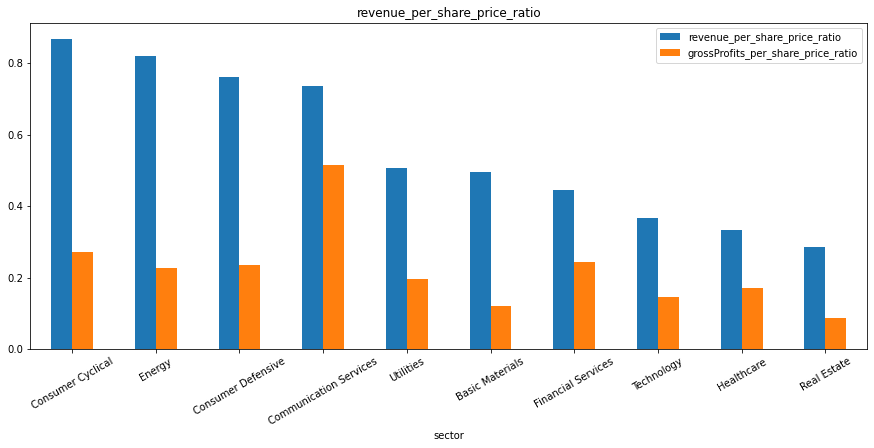

In [30]:
fig,axes = plt.subplots(1,1,figsize=[15,6])
rps[(rps.revenue_per_share_price_ratio<4)&\
    (rps.revenue_per_share_price_ratio>-10)].groupby('sector')[['revenue_per_share_price_ratio',
                                    'grossProfits_per_share_price_ratio']].mean().sort_values(ascending=False,
    by='revenue_per_share_price_ratio').replace(np.inf,np.nan).dropna()[:-1].plot.bar(ax=axes)
axes.set_title('revenue_per_share_price_ratio')
plt.xticks(rotation=30)
plt.show()

In [31]:
from pandas.api.types import is_numeric_dtype
corr_dict = dict()
for col in rps:
    if (is_numeric_dtype(rps[col])) &(col!='currentPrice')&(rps[col].isna().mean()<0.2):
        corr_dict[col] = rps[[col,'currentPrice']].corr().loc[col,'currentPrice']
correlations = pd.DataFrame(corr_dict,index=['correlations','D']).T
correlations['abs_correlations'] = np.abs(correlations['correlations'])
correlations = correlations[['correlations','abs_correlations']]

In [32]:
correlations.sort_values(by=['abs_correlations'],ascending=False).to_csv('correlations.csv')

In [33]:
rps[['longName','sector','forwardEps']].sort_values(by=['forwardEps'],ascending=False)[:10]

,longName,sector,forwardEps
ticker,,,
DAVA,Endava plc,Technology,148.03
GOOG,Alphabet Inc.,Communication Services,95.21
GOOGL,Alphabet Inc.,Communication Services,95.09
BKNG,Booking Holdings Inc.,Consumer Cyclical,92.62
AZO,"AutoZone, Inc.",Consumer Cyclical,91.38
AMZN,"Amazon.com, Inc.",Consumer Cyclical,72.27
CABO,"Cable One, Inc.",Communication Services,56.18
BLK,"BlackRock, Inc.",Financial Services,42.90
REGN,"Regeneron Pharmaceuticals, Inc.",Healthcare,40.07


In [34]:
rps[['longName','sector','forwardEps']].sort_values(by=['forwardEps'],ascending=False)[10:20]

,longName,sector,forwardEps
ticker,,,
CACC,Credit Acceptance Corporation,Financial Services,34.02
CMG,"Chipotle Mexican Grill, Inc.",Consumer Cyclical,32.43
LRCX,Lam Research Corporation,Technology,32.42
NVAX,"Novavax, Inc.",Healthcare,30.21
RE,"Everest Re Group, Ltd.",Financial Services,30.03
AVGO,Broadcom Inc.,Technology,29.97
ANTM,"Anthem, Inc.",Healthcare,28.32
LMT,Lockheed Martin Corporation,Industrials,27.90
CHTR,"Charter Communications, Inc.",Communication Services,27.81


In [35]:
rps[['longName','sector','forwardEps']].sort_values(by=['forwardEps'],ascending=False)[20:30]

,longName,sector,forwardEps
ticker,,,
LAD,"Lithia Motors, Inc.",Consumer Cyclical,25.73
SIVB,SVB Financial Group,Financial Services,25.70
NOC,Northrop Grumman Corporation,Industrials,25.60
HUM,Humana Inc.,Healthcare,24.61
URI,"United Rentals, Inc.",Industrials,23.89
WHR,Whirlpool Corporation,Consumer Cyclical,23.16
CI,Cigna Corporation,Healthcare,23.12
GWW,"W.W. Grainger, Inc.",Industrials,22.67
AMP,"Ameriprise Financial, Inc.",Financial Services,22.56


What's going on with the small blip up on the negative forwardEps?

<AxesSubplot:title={'center':'currentPrice'}, xlabel='forwardEps_bin'>

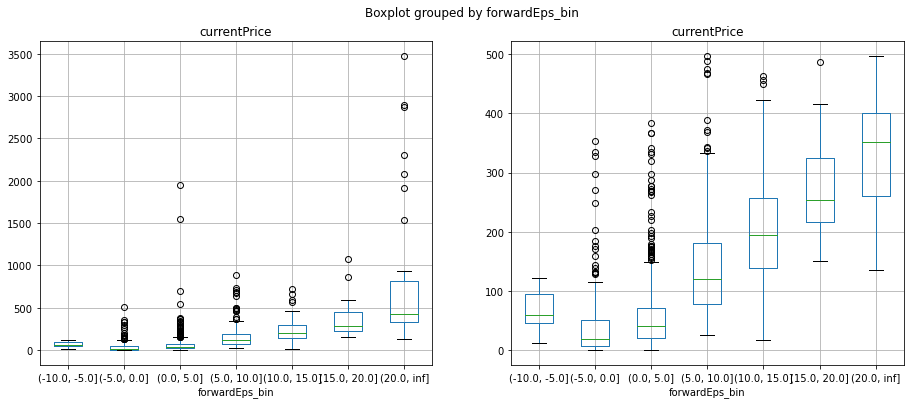

In [36]:
rps['forwardEps_bin'] = pd.cut(rps['forwardEps'],bins=[-10,-5,0,5,10,15,20,np.inf])
fig,axes = plt.subplots(1,2,figsize=[15,6])
rps.boxplot(column='currentPrice',by='forwardEps_bin',ax=axes[0])
rps[rps.currentPrice<500].boxplot(column='currentPrice',by='forwardEps_bin',ax=axes[1])

In [37]:
rps[rps.forwardEps<0].to_csv('negative_feps.csv')

<AxesSubplot:title={'center':'currentPrice'}, xlabel='totalCashPerShare_bin'>

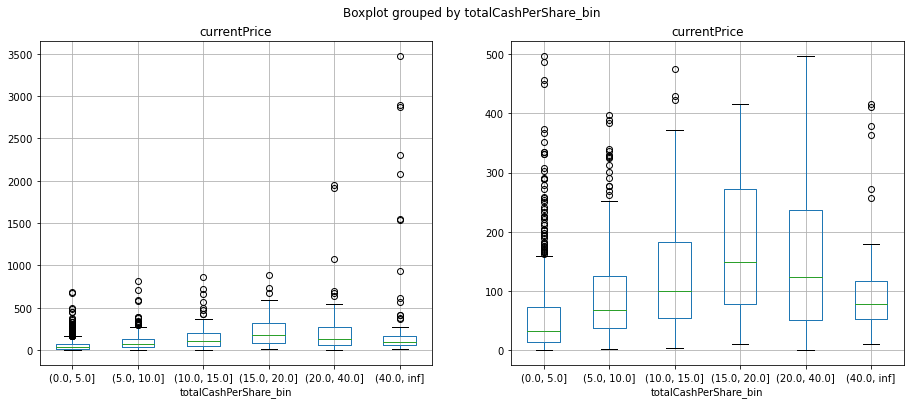

In [38]:
rps['totalCashPerShare_bin'] = pd.cut(rps['totalCashPerShare'],bins=[0,5,10,15,20,40,np.inf])
fig,axes = plt.subplots(1,2,figsize=[15,6])
rps.boxplot(column='currentPrice',by='totalCashPerShare_bin',ax=axes[0])
rps[rps.currentPrice<500].boxplot(column='currentPrice',by='totalCashPerShare_bin',ax=axes[1])

What's a good indicator of forwardEPs?

In [39]:
def calc_corr(df,column,var):
    corr_dict = dict()
    for group in df[column].unique():
        corr_dict[group] = df[df[column]==group][[var,'forwardEps']].corr().loc[var,'forwardEps']
    df_cor = pd.DataFrame(corr_dict,index=['corr']).T
    df_cor['abs_corr'] = np.abs(df_cor['corr'])
    
    x = df[column].value_counts().to_frame(name='no_obs').reset_index()
    return df_cor.dropna().sort_values(by=['abs_corr'],ascending=False).reset_index().merge(x,on='index')

calc_corr(rps,'sector','currentPrice')

,index,corr,abs_corr,no_obs
0,Communication Services,0.979173,0.979173,83
1,Industrials,0.860029,0.860029,163
2,Financial Services,0.841163,0.841163,154
3,Energy,0.832742,0.832742,73
4,Utilities,0.808369,0.808369,42
5,Consumer Cyclical,0.798974,0.798974,142
6,Basic Materials,0.770147,0.770147,54
7,Consumer Defensive,0.752614,0.752614,55
8,Healthcare,0.666511,0.666511,160
9,Real Estate,0.641712,0.641712,87


In [40]:
from pandas.api.types import is_numeric_dtype
corr_dict = dict()
for col in rps:
    if (is_numeric_dtype(rps[col])) &(col!='forwardEps')&(rps[col].isna().mean()<0.2):
        corr_dict[col] = rps[[col,'forwardEps']].corr().loc[col,'forwardEps']
correlations = pd.DataFrame(corr_dict,index=['correlations','D']).T
correlations['abs_correlations'] = np.abs(correlations['correlations'])
correlations = correlations[['correlations','abs_correlations']].sort_values(by=['abs_correlations'],ascending=False)
correlations

,correlations,abs_correlations
targetMeanPrice,0.734077,0.734077
targetLowPrice,0.732484,0.732484
targetHighPrice,0.730135,0.730135
targetMedianPrice,0.727940,0.727940
twoHundredDayAverage,0.714173,0.714173
...,...,...
forwardPE,0.005399,0.005399
enterpriseToEbitda,0.002603,0.002603
lastFiscalYearEnd,0.001121,0.001121
nextFiscalYearEnd,0.001119,0.001119


Things highly correlated to forwardEps are the 'returnonAsset', 'shortPercentFloat', 'ebitdaMargins'

In [41]:
correlations[20:450]

,correlations,abs_correlations
returnOnAssets,0.246155,0.246155
numberOfAnalystOpinions,0.242879,0.242879
shortPercentOfFloat,-0.206698,0.206698
fullTimeEmployees,0.204591,0.204591
sharesPercentSharesOut,-0.180439,0.180439
...,...,...
forwardPE,0.005399,0.005399
enterpriseToEbitda,0.002603,0.002603
lastFiscalYearEnd,0.001121,0.001121
nextFiscalYearEnd,0.001119,0.001119


In [42]:
correlations.to_csv('forwardEPs_correlations.csv')

Building a quick regression model. Interesting variables are:
- revenuePerShare
- enterpriseValue
- trailingEps
- isEsgPopulated
- returnOnAssets
- freecashflow

MSE:8.90


<ipython-input-43-967459f5c8d7>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rps_clean['pred_forwardEps'] = reg.predict(X_imp[:,rfe.ranking_==1])


<AxesSubplot:xlabel='pred_forwardEps', ylabel='forwardEps'>

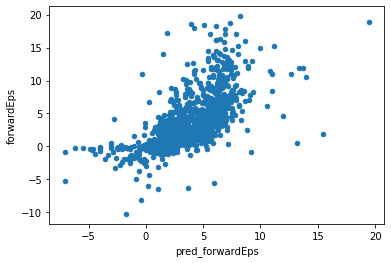

In [43]:
from sklearn.linear_model import Ridge
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE

reg = Ridge(alpha=10**-1)
imp = KNNImputer(n_neighbors=5)
scaler = StandardScaler()

features = ['marketCap',
            'returnOnAssets',
            'shortPercentOfFloat',
            'fullTimeEmployees',
            'ebitdaMargins',
            'heldPercentInstitutions',
            'totalCashPerShare',
            'profitMargins',
            'enterpriseValue',
            'returnOnEquity',
            'numberOfAnalystOpinions',
            'regularMarketVolume',
            'isEsgPopulated',
            'trailingEps',
            'revenuePerShare',
            'heldPercentInsiders',
            'beta',
            'fullTimeEmployees',
            'freeCashflow'
           ]
rps_clean = rps[(~rps.forwardEps.isna())&(rps.forwardEps<20)]
X,y = rps_clean[features], rps_clean['forwardEps'].values
X_imp = pd.DataFrame(imp.fit_transform(X),columns=X.columns)
X_imp = scaler.fit_transform(X_imp)


reg = Ridge(alpha=10**-1)
rfe = RFE(estimator=reg, n_features_to_select=11, step=1)
rfe.fit(X_imp, y)

reg = Ridge(alpha=10**-1)
reg.fit(X_imp[:,rfe.ranking_==1],y)
rps_clean['pred_forwardEps'] = reg.predict(X_imp[:,rfe.ranking_==1])
error = mean_squared_error(rps_clean['pred_forwardEps'],rps_clean['forwardEps'])
print(f'MSE:{error:0.2f}')
rps_clean.plot.scatter(x='pred_forwardEps',y='forwardEps')

In [44]:
coef = pd.DataFrame(reg.coef_,index=rps_clean[features].loc[:,rfe.ranking_==1].columns,columns=['coef'])
coef['abs_coef'] = np.abs(coef['coef'])
coef.sort_values(by=['abs_coef'],ascending=False)

,coef,abs_coef
revenuePerShare,6.394043,6.394043
enterpriseValue,-5.454017,5.454017
marketCap,1.378225,1.378225
trailingEps,1.152842,1.152842
isEsgPopulated,1.114816,1.114816
returnOnAssets,1.073732,1.073732
freeCashflow,0.745030,0.745030
regularMarketVolume,-0.501908,0.501908
numberOfAnalystOpinions,0.440914,0.440914
heldPercentInstitutions,0.426323,0.426323


<AxesSubplot:>

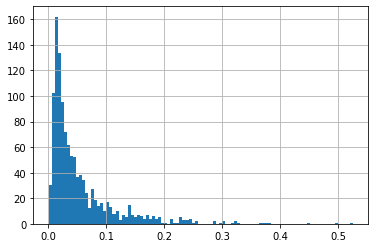

In [45]:
rps['shortPercentOfFloat'].hist(bins=100)

<AxesSubplot:xlabel='forwardEps', ylabel='currentPrice'>

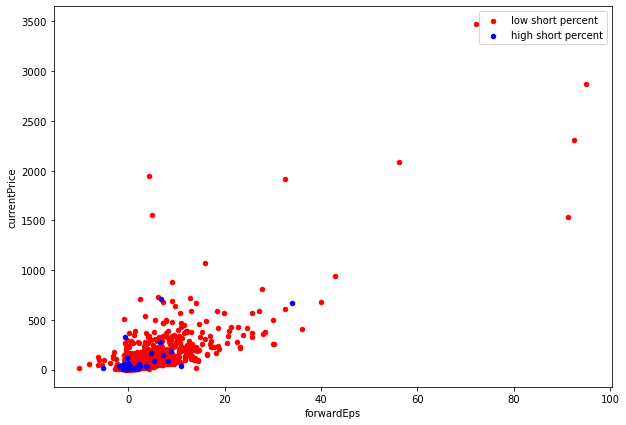

In [46]:
fig,axes = plt.subplots(1,1,figsize=[10,7])
threshold = 0.2
rps[rps['shortPercentOfFloat']<=threshold].plot.scatter(x='forwardEps',y='currentPrice',ax=axes,c='red',label='low short percent')
rps[rps['shortPercentOfFloat']>threshold].plot.scatter(x='forwardEps',y='currentPrice',ax=axes,c='blue',label='high short percent')

September 2021 is the latest date

In [47]:
rps[(rps['shortPercentOfFloat']>threshold)&(rps.forwardEps>20)][['longName','sector','forwardEps','shortPercentOfFloat']]

,longName,sector,forwardEps,shortPercentOfFloat
ticker,,,,
CACC,Credit Acceptance Corporation,Financial Services,34.02,0.2485


In [48]:
rps[(rps['shortPercentOfFloat']>threshold)&(rps.currentPrice>500)][['longName','sector','forwardEps','shortPercentOfFloat']]

,longName,sector,forwardEps,shortPercentOfFloat
ticker,,,,
CACC,Credit Acceptance Corporation,Financial Services,34.02,0.2485
MSTR,MicroStrategy Incorporated,Technology,6.71,0.3298


In [49]:
rps[(rps['shortPercentOfFloat']>0.2)][['longName',
                                       'sector',
                                       'forwardEps',
                                       'shortPercentOfFloat']].sort_values(by=['shortPercentOfFloat'],
                                                                           ascending=False).to_csv('highly_shorted_stonks.csv')

<a id='section_1_2_2'></a>
### 1.2.2 Discounted Cashflow

<a id='section_1_2_2'></a>
### 1.2.2 Asset Based Valuation

<a id='section_1_3'></a>
## 1.3 Predicting forward Eps

Note here we are not predicting the quoted forward EPS but the actual outcome.

<a id='section_1_3_0'></a>
### 1.3.0 Calculating trends and accelerations in cashflow generation

In [102]:
from collections import defaultdict
import numpy as np

fund_val = defaultdict(list)

def get_value(key,data_dict):
    if key in data_dict:
        return data_dict[key]
    else:
        return np.nan
    
data_points = ['circulatingSupply',
    'floatShares',
    'grossProfits',
    'shortName',
    'sector',
    'sharesOutstanding',
    'totalCashPerShare',
    'sharesShort',
    'shortRatio', 
    'sharesShortPreviousMonthDate',
    'marketCap',
    'revenuePerShare',
    'currentPrice']

data_points = [x for x in data_dict['BABA']['info'].keys()]

for ticker,ticker_data in data_dict.items():
        
    fund_val['ticker'].append(ticker)
    for col in data_points:
        fund_val[col].append(get_value(col,ticker_data['info']))

rps = pd.DataFrame(fund_val).set_index('ticker')
rps['revenue_per_share_price_ratio'] = rps['revenuePerShare']/rps['currentPrice']
rps['grossProfits_per_share_price_ratio'] = (rps['grossProfits']/rps['sharesOutstanding'])/rps['currentPrice']
rps.head()

,zip,sector,fullTimeEmployees,longBusinessSummary,city,phone,country,companyOfficers,website,maxAge,...,bid,tradeable,dividendYield,bidSize,dayHigh,regularMarketPrice,preMarketPrice,logo_url,revenue_per_share_price_ratio,grossProfits_per_share_price_ratio
ticker,,,,,,,,,,,,,,,,,,,,,
A,95051,Healthcare,17000.0,"Agilent Technologies, Inc. provides applicatio...",Santa Clara,800 227 9770,United States,[],https://www.agilent.com,1,...,102.77,False,0.0058,1100.0,120.7150,119.38,None,https://logo.clearbit.com/agilent.com,0.174116,0.094500
AA,15212-5858,Basic Materials,12200.0,"Alcoa Corporation, together with its subsidiar...",Pittsburgh,412-315-2900,United States,[],https://www.alcoa.com,1,...,58.85,False,0.0053,1100.0,59.6700,58.33,None,https://logo.clearbit.com/alcoa.com,1.120058,0.279740
AAL,76155,Industrials,123400.0,"American Airlines Group Inc., through its subs...",Fort Worth,682 278 9000,United States,[],https://www.aa.com,1,...,16.55,False,NaN,21500.0,16.6484,16.58,None,https://logo.clearbit.com/aa.com,2.798552,0.180145
AAN,30339-3194,Consumer Cyclical,9400.0,The Aarons Company Inc. provides lease-to-own ...,Atlanta,678 402 3000,United States,[],https://www.aarons.com,1,...,16.50,False,0.0158,1000.0,20.3900,19.99,None,https://logo.clearbit.com/aarons.com,2.723412,1.721687
AAOI,77478,Technology,2682.0,"Applied Optoelectronics, Inc. designs, manufac...",Sugar Land,281 295 1800,United States,[],https://www.ao-inc.com,1,...,2.14,False,NaN,900.0,2.3300,2.33,None,https://logo.clearbit.com/ao-inc.com,3.457511,0.794627


In [103]:
data_dict['AAPL'].keys()

dict_keys(['info', 'history', 'financials', 'balance_sheet'])

In [104]:
pd.DataFrame(data_dict['AAPL']['balance_sheet']).columns.tolist()

['Total Liab',
 'Total Stockholder Equity',
 'Other Current Liab',
 'Total Assets',
 'Common Stock',
 'Other Current Assets',
 'Retained Earnings',
 'Other Liab',
 'Treasury Stock',
 'Other Assets',
 'Cash',
 'Total Current Liabilities',
 'Short Long Term Debt',
 'Other Stockholder Equity',
 'Property Plant Equipment',
 'Total Current Assets',
 'Long Term Investments',
 'Net Tangible Assets',
 'Short Term Investments',
 'Net Receivables',
 'Long Term Debt',
 'Inventory',
 'Accounts Payable']

In [107]:
apple_data = pd.DataFrame(data_dict['AAPL']['balance_sheet'])

In [108]:
apple_data['cashflow'] = apple_data['Total Revenue'] - apple_data['Total Operating Expenses']
apple_data[['Total Revenue','Total Operating Expenses','cashflow']].head()

KeyError: 'Total Revenue'

In [109]:
apple_data[['Total Revenue','Total Operating Expenses','cashflow']].plot()

KeyError: "None of [Index(['Total Revenue', 'Total Operating Expenses', 'cashflow'], dtype='object')] are in the [columns]"

In [110]:
import tqdm
financials_dfs = list()
for ticker,data in tqdm.tqdm(data_dict.items()):
    financials_df = pd.DataFrame(data_dict[ticker]['financials']).sort_index().reset_index().rename(columns={'index':'quarter'})
    financials_df['ticker'] = ticker
    financials_dfs.append(financials_df)
financials = pd.concat(financials_dfs,axis=0).set_index('ticker').join(rps[['floatShares']],how='inner')
financials.head()

100%|█████████████████████████████████████████████████████████████████████████████| 1400/1400 [00:02<00:00, 513.39it/s]


,quarter,Research Development,Effect Of Accounting Charges,Income Before Tax,Minority Interest,Net Income,Selling General Administrative,Gross Profit,Ebit,Operating Income,...,Other Items,Income Tax Expense,Total Revenue,Total Operating Expenses,Cost Of Revenue,Total Other Income Expense Net,Discontinued Operations,Net Income From Continuing Ops,Net Income Applicable To Common Shares,floatShares
ticker,,,,,,,,,,,,,,,,,,,,,
A,2018-10-31,387000000.0,None,9.460000e+08,4.000000e+06,3.160000e+08,1.322000e+09,2.680000e+09,9.710000e+08,9.710000e+08,...,None,630000000.0,4.914000e+09,3.943000e+09,2.234000e+09,-25000000.0,NaN,3.160000e+08,3.160000e+08,301140095.0
A,2019-10-31,404000000.0,None,9.190000e+08,NaN,1.071000e+09,1.358000e+09,2.805000e+09,1.043000e+09,1.043000e+09,...,None,-152000000.0,5.163000e+09,4.120000e+09,2.358000e+09,-124000000.0,NaN,1.071000e+09,1.071000e+09,301140095.0
A,2020-10-31,397000000.0,None,8.420000e+08,NaN,7.190000e+08,1.395000e+09,2.837000e+09,1.045000e+09,1.045000e+09,...,None,123000000.0,5.339000e+09,4.294000e+09,2.502000e+09,-203000000.0,NaN,7.190000e+08,7.190000e+08,301140095.0
A,2021-10-31,441000000.0,None,1.360000e+09,NaN,1.210000e+09,1.562000e+09,3.407000e+09,1.404000e+09,1.404000e+09,...,None,150000000.0,6.319000e+09,4.915000e+09,2.912000e+09,-44000000.0,NaN,1.210000e+09,1.210000e+09,301140095.0
AA,2018-12-31,31000000.0,None,1.625000e+09,1.970000e+09,2.500000e+08,3.870000e+08,3.353000e+09,2.077000e+09,2.077000e+09,...,None,732000000.0,1.340300e+10,1.132600e+10,1.005000e+10,-452000000.0,NaN,8.930000e+08,2.500000e+08,184411126.0


In [112]:
financials.to_pickle('financials_15052022.pkl')

In [111]:
financials['cashflow'] = financials['Total Revenue'] - financials['Total Operating Expenses']
financials['income'] = financials['Net Income Applicable To Common Shares'] - financials['Total Operating Expenses']
financials['EPS'] = financials['income']/financials['floatShares']
financials['nEPS'] = financials['Net Income Applicable To Common Shares']/financials['floatShares']
financials.head()

,quarter,Research Development,Effect Of Accounting Charges,Income Before Tax,Minority Interest,Net Income,Selling General Administrative,Gross Profit,Ebit,Operating Income,...,Cost Of Revenue,Total Other Income Expense Net,Discontinued Operations,Net Income From Continuing Ops,Net Income Applicable To Common Shares,floatShares,cashflow,income,EPS,nEPS
ticker,,,,,,,,,,,,,,,,,,,,,
A,2018-10-31,387000000.0,None,9.460000e+08,4.000000e+06,3.160000e+08,1.322000e+09,2.680000e+09,9.710000e+08,9.710000e+08,...,2.234000e+09,-25000000.0,NaN,3.160000e+08,3.160000e+08,301140095.0,9.710000e+08,-3.627000e+09,-12.044228,1.049345
A,2019-10-31,404000000.0,None,9.190000e+08,NaN,1.071000e+09,1.358000e+09,2.805000e+09,1.043000e+09,1.043000e+09,...,2.358000e+09,-124000000.0,NaN,1.071000e+09,1.071000e+09,301140095.0,1.043000e+09,-3.049000e+09,-10.124856,3.556484
A,2020-10-31,397000000.0,None,8.420000e+08,NaN,7.190000e+08,1.395000e+09,2.837000e+09,1.045000e+09,1.045000e+09,...,2.502000e+09,-203000000.0,NaN,7.190000e+08,7.190000e+08,301140095.0,1.045000e+09,-3.575000e+09,-11.871551,2.387593
A,2021-10-31,441000000.0,None,1.360000e+09,NaN,1.210000e+09,1.562000e+09,3.407000e+09,1.404000e+09,1.404000e+09,...,2.912000e+09,-44000000.0,NaN,1.210000e+09,1.210000e+09,301140095.0,1.404000e+09,-3.705000e+09,-12.303244,4.018063
AA,2018-12-31,31000000.0,None,1.625000e+09,1.970000e+09,2.500000e+08,3.870000e+08,3.353000e+09,2.077000e+09,2.077000e+09,...,1.005000e+10,-452000000.0,NaN,8.930000e+08,2.500000e+08,184411126.0,2.077000e+09,-1.107600e+10,-60.061452,1.355667


In [61]:
financials.to_csv('financials.csv')

In [218]:
from matplotlib.dates import date2num

def calc_trend(datetimes,values):
    
    if isinstance(datetimes,str):
        datetimes = pd.to_datetime(datetimes)
    datetimes_numeric = date2num(datetimes)
    coefs = np.round(np.polyfit(datetimes_numeric,values,2),3)
    return [coefs[0],coefs[1],coefs[2]]

calc_trend(apple_financials.quarter,apple_financials.cashflow)

[-13577.768, 490552768.385, -4362859772452.334]

In [219]:
cashflow_trends = financials.groupby('ticker').apply(lambda x:calc_trend(x.quarter,x.cashflow)).to_frame('trend_coefs')
cashflow_trends['acceleration'] = cashflow_trends['trend_coefs'].apply(lambda x: x[0])
cashflow_trends['trend'] = cashflow_trends['trend_coefs'].apply(lambda x: x[1])
cashflow_trends['intercept'] = cashflow_trends['trend_coefs'].apply(lambda x: x[2])
cashflow_trends.head()

<ipython-input-219-dd15640e5a03>:1: RankWarning: Polyfit may be poorly conditioned
  cashflow_trends = financials.groupby('ticker').apply(lambda x:calc_trend(x.quarter,x.cashflow)).to_frame('trend_coefs')
<ipython-input-219-dd15640e5a03>:1: RankWarning: Polyfit may be poorly conditioned
  cashflow_trends = financials.groupby('ticker').apply(lambda x:calc_trend(x.quarter,x.cashflow)).to_frame('trend_coefs')
<ipython-input-219-dd15640e5a03>:1: RankWarning: Polyfit may be poorly conditioned
  cashflow_trends = financials.groupby('ticker').apply(lambda x:calc_trend(x.quarter,x.cashflow)).to_frame('trend_coefs')


,trend_coefs,acceleration,trend,intercept
ticker,,,,
A,"[-219.453, 8084749.451, -73411587375.036]",-219.453,8.084749e+06,-7.341159e+10
AA,"[-1609.561, 56832018.669, -499915398252.159]",-1609.561,5.683202e+07,-4.999154e+11
AAL,"[-25458.168, 907276680.98, -8076980847940.137]",-25458.168,9.072767e+08,-8.076981e+12
AAN,"[59.241, -2125516.873, 19234881988.047]",59.241,-2.125517e+06,1.923488e+10
AAOI,"[183.03, -6739884.078, 61991176200.083]",183.030,-6.739884e+06,6.199118e+10


<AxesSubplot:>

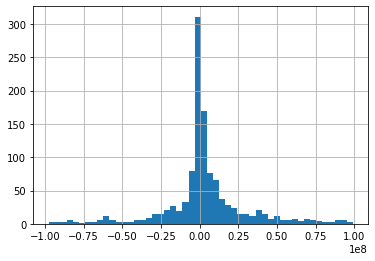

In [220]:
cashflow_trends[(cashflow_trends['trend']>-10**8)&\
                (cashflow_trends['trend']<10**8)]['trend'].hist(bins=50)

In [221]:
cashflow_trends_0 = rps[['forwardEps']].join(cashflow_trends)

In [222]:
financials['total_revenue'] = financials['Total Revenue']

In [223]:
def calc_derivatives(df,col):
    df_deriv = df[~df[col].isna()].groupby('ticker').apply(lambda x:calc_trend(x.quarter,x[col])).to_frame('trend_coefs')
    df_deriv[f'{col}_acceleration'] = df_deriv['trend_coefs'].apply(lambda x: x[0])
    df_deriv[f'{col}_trend'] = df_deriv['trend_coefs'].apply(lambda x: x[1])
    df_deriv[f'{col}_intercept'] = df_deriv['trend_coefs'].apply(lambda x: x[2])
    return df_deriv.drop(columns=['trend_coefs'])
financials.head()

,quarter,Research Development,Effect Of Accounting Charges,Income Before Tax,Minority Interest,Net Income,Selling General Administrative,Gross Profit,Ebit,Operating Income,...,Total Other Income Expense Net,Discontinued Operations,Net Income From Continuing Ops,Net Income Applicable To Common Shares,floatShares,cashflow,income,EPS,nEPS,total_revenue
ticker,,,,,,,,,,,,,,,,,,,,,
A,2017-10-31,3.41e+08,None,8.030000e+08,4e+06,6.840000e+08,1.205e+09,2.399000e+09,8.530000e+08,8.53e+08,...,-50000000.0,None,6.840000e+08,6.840000e+08,302060700.0,8.530000e+08,-2.935000e+09,-9.716590,2.264446,4.472000e+09
A,2018-10-31,3.87e+08,None,9.460000e+08,4e+06,3.160000e+08,1.322e+09,2.680000e+09,9.710000e+08,9.71e+08,...,-25000000.0,None,3.160000e+08,3.160000e+08,302060700.0,9.710000e+08,-3.627000e+09,-12.007520,1.046147,4.914000e+09
A,2019-10-31,4.04e+08,None,9.190000e+08,NaN,1.071000e+09,1.358e+09,2.805000e+09,1.043000e+09,1.043e+09,...,-124000000.0,None,1.071000e+09,1.071000e+09,302060700.0,1.043000e+09,-3.049000e+09,-10.093998,3.545645,5.163000e+09
A,2020-10-31,3.98e+08,None,8.420000e+08,NaN,7.190000e+08,1.395e+09,2.837000e+09,1.044000e+09,1.044e+09,...,-202000000.0,None,7.190000e+08,7.190000e+08,302060700.0,1.044000e+09,-3.576000e+09,-11.838680,2.380316,5.339000e+09
AA,2017-12-31,3.2e+07,None,1.200000e+09,2.275e+09,2.790000e+08,3.65e+08,2.757000e+09,1.592000e+09,1.592e+09,...,-392000000.0,None,6.080000e+08,2.790000e+08,185509508.0,1.592000e+09,-9.781000e+09,-52.725060,1.503966,1.165200e+10


In [224]:
calc_derivatives(financials,'EPS')

<ipython-input-223-cc7b82857fb3>:2: RankWarning: Polyfit may be poorly conditioned
  df_deriv = df[~df[col].isna()].groupby('ticker').apply(lambda x:calc_trend(x.quarter,x[col])).to_frame('trend_coefs')
<ipython-input-223-cc7b82857fb3>:2: RankWarning: Polyfit may be poorly conditioned
  df_deriv = df[~df[col].isna()].groupby('ticker').apply(lambda x:calc_trend(x.quarter,x[col])).to_frame('trend_coefs')


,EPS_acceleration,EPS_trend,EPS_intercept
ticker,,,
A,0.0,-0.038,341.765
AA,0.0,-1.099,9839.296
AAL,0.0,-0.645,5787.089
AAN,-0.0,0.208,-1846.169
AAOI,0.0,-0.063,598.883
...,...,...,...
ZIXI,-0.0,0.062,-531.802
ZM,-0.0,0.184,-1621.755
ZNGA,-0.0,0.063,-557.373


In [225]:
derivs_list = list()
for col in tqdm.tqdm(financials.columns.tolist()):
    if is_numeric_dtype(financials[col]):
        try:
            derivs_list.append(calc_derivatives(financials,col))
        except:
            print(col)

  0%|                                                                                           | 0/29 [00:00<?, ?it/s]<ipython-input-223-cc7b82857fb3>:2: RankWarning: Polyfit may be poorly conditioned
  df_deriv = df[~df[col].isna()].groupby('ticker').apply(lambda x:calc_trend(x.quarter,x[col])).to_frame('trend_coefs')
<ipython-input-223-cc7b82857fb3>:2: RankWarning: Polyfit may be poorly conditioned
  df_deriv = df[~df[col].isna()].groupby('ticker').apply(lambda x:calc_trend(x.quarter,x[col])).to_frame('trend_coefs')
<ipython-input-223-cc7b82857fb3>:2: RankWarning: Polyfit may be poorly conditioned
  df_deriv = df[~df[col].isna()].groupby('ticker').apply(lambda x:calc_trend(x.quarter,x[col])).to_frame('trend_coefs')
 14%|███████████▍                                                                       | 4/29 [00:00<00:01, 13.32it/s]<ipython-input-223-cc7b82857fb3>:2: RankWarning: Polyfit may be poorly conditioned
  df_deriv = df[~df[col].isna()].groupby('ticker').apply(lambda x:calc

 83%|███████████████████████████████████████████████████████████████████▊              | 24/29 [00:03<00:01,  3.93it/s]<ipython-input-223-cc7b82857fb3>:2: RankWarning: Polyfit may be poorly conditioned
  df_deriv = df[~df[col].isna()].groupby('ticker').apply(lambda x:calc_trend(x.quarter,x[col])).to_frame('trend_coefs')
<ipython-input-223-cc7b82857fb3>:2: RankWarning: Polyfit may be poorly conditioned
  df_deriv = df[~df[col].isna()].groupby('ticker').apply(lambda x:calc_trend(x.quarter,x[col])).to_frame('trend_coefs')
<ipython-input-223-cc7b82857fb3>:2: RankWarning: Polyfit may be poorly conditioned
  df_deriv = df[~df[col].isna()].groupby('ticker').apply(lambda x:calc_trend(x.quarter,x[col])).to_frame('trend_coefs')
 86%|██████████████████████████████████████████████████████████████████████▋           | 25/29 [00:03<00:01,  3.72it/s]<ipython-input-223-cc7b82857fb3>:2: RankWarning: Polyfit may be poorly conditioned
  df_deriv = df[~df[col].isna()].groupby('ticker').apply(lambda x:calc

In [226]:
trends = pd.concat(derivs_list,axis=1)

In [227]:
correlations = trends.join(rps[['forwardEps']]).corr()[['forwardEps']]
correlations['abs_forwardEps'] = np.abs(correlations['forwardEps'])
correlations.head()

,forwardEps,abs_forwardEps
Income Before Tax_acceleration,0.021539,0.021539
Income Before Tax_trend,-0.021140,0.021140
Income Before Tax_intercept,0.020866,0.020866
Net Income_acceleration,0.008680,0.008680
Net Income_trend,-0.008369,0.008369


In [228]:
correlations.sort_values(by=['abs_forwardEps'],ascending=False)[:10]

,forwardEps,abs_forwardEps
forwardEps,1.000000,1.000000
Income Tax Expense_acceleration,0.037369,0.037369
Income Tax Expense_trend,-0.036908,0.036908
nEPS_trend,0.036793,0.036793
Income Tax Expense_intercept,0.036779,0.036779
nEPS_intercept,-0.036750,0.036750
Total Other Income Expense Net_acceleration,0.021810,0.021810
Total Other Income Expense Net_trend,-0.021713,0.021713
Total Other Income Expense Net_intercept,0.021619,0.021619
Income Before Tax_acceleration,0.021539,0.021539


In [216]:
correlations.sort_values(by=['abs_forwardEps'],ascending=False).to_csv('trends_correlations.csv')

<a id='section_2'></a>
## 2.0 Forecaster

In [128]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [129]:
financials = pd.read_csv('financials.csv',parse_dates=['quarter'])
financials

,ticker,quarter,Research Development,Effect Of Accounting Charges,Income Before Tax,Minority Interest,Net Income,Selling General Administrative,Gross Profit,Ebit,...,Cost Of Revenue,Total Other Income Expense Net,Discontinued Operations,Net Income From Continuing Ops,Net Income Applicable To Common Shares,floatShares,cashflow,income,EPS,nEPS
0,A,2017-10-31,341000000.0,NaN,8.030000e+08,4.000000e+06,6.840000e+08,1.205000e+09,2.399000e+09,8.530000e+08,...,2.073000e+09,-50000000.0,NaN,6.840000e+08,6.840000e+08,302060700.0,8.530000e+08,-2.935000e+09,-9.716590,2.264446
1,A,2018-10-31,387000000.0,NaN,9.460000e+08,4.000000e+06,3.160000e+08,1.322000e+09,2.680000e+09,9.710000e+08,...,2.234000e+09,-25000000.0,NaN,3.160000e+08,3.160000e+08,302060700.0,9.710000e+08,-3.627000e+09,-12.007520,1.046147
2,A,2019-10-31,404000000.0,NaN,9.190000e+08,NaN,1.071000e+09,1.358000e+09,2.805000e+09,1.043000e+09,...,2.358000e+09,-124000000.0,NaN,1.071000e+09,1.071000e+09,302060700.0,1.043000e+09,-3.049000e+09,-10.093998,3.545645
3,A,2020-10-31,398000000.0,NaN,8.420000e+08,NaN,7.190000e+08,1.395000e+09,2.837000e+09,1.044000e+09,...,2.502000e+09,-202000000.0,NaN,7.190000e+08,7.190000e+08,302060700.0,1.044000e+09,-3.576000e+09,-11.838680,2.380316
4,AA,2017-12-31,32000000.0,NaN,1.200000e+09,2.275000e+09,2.790000e+08,3.650000e+08,2.757000e+09,1.592000e+09,...,8.895000e+09,-392000000.0,NaN,6.080000e+08,2.790000e+08,185509508.0,1.592000e+09,-9.781000e+09,-52.725060,1.503966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5169,ZS,2020-07-31,97879000.0,NaN,-1.127280e+08,NaN,-1.151160e+08,3.314110e+08,3.355360e+08,-9.375400e+07,...,9.573300e+07,-18974000.0,NaN,-1.151160e+08,-1.151160e+08,105852611.0,-9.375400e+07,-6.401390e+08,-6.047456,-1.087512
5170,ZTS,2017-12-31,382000000.0,NaN,1.525000e+09,1.600000e+07,8.640000e+08,1.325000e+09,3.546000e+09,1.748000e+09,...,1.761000e+09,-223000000.0,NaN,8.620000e+08,8.640000e+08,473133748.0,1.748000e+09,-2.695000e+09,-5.696064,1.826122
5171,ZTS,2018-12-31,432000000.0,NaN,1.690000e+09,4.000000e+06,1.428000e+09,1.482000e+09,3.922000e+09,1.891000e+09,...,1.903000e+09,-201000000.0,NaN,1.424000e+09,1.428000e+09,473133748.0,1.891000e+09,-2.506000e+09,-5.296600,3.018174
5172,ZTS,2019-12-31,457000000.0,NaN,1.801000e+09,4.000000e+06,1.500000e+09,1.636000e+09,4.345000e+09,2.097000e+09,...,1.915000e+09,-296000000.0,NaN,1.500000e+09,1.500000e+09,473133748.0,2.097000e+09,-2.663000e+09,-5.628430,3.170351


In [130]:
tesla = financials[financials.ticker=='TSLA']
tesla

,ticker,quarter,Research Development,Effect Of Accounting Charges,Income Before Tax,Minority Interest,Net Income,Selling General Administrative,Gross Profit,Ebit,...,Cost Of Revenue,Total Other Income Expense Net,Discontinued Operations,Net Income From Continuing Ops,Net Income Applicable To Common Shares,floatShares,cashflow,income,EPS,nEPS
4634,TSLA,2017-12-31,1.378000e+09,NaN,-2.209000e+09,1.395080e+09,-1.962000e+09,2.477000e+09,2.223000e+09,-1.632000e+09,...,9.536000e+09,-577000000.0,NaN,-2.241000e+09,-1.962000e+09,775057145.0,-1.632000e+09,-1.535300e+10,-19.808862,-2.531426
4635,TSLA,2018-12-31,1.460000e+09,NaN,-1.005000e+09,1.390000e+09,-9.760000e+08,2.835000e+09,4.042000e+09,-2.530000e+08,...,1.741900e+10,-752000000.0,NaN,-1.063000e+09,-9.760000e+08,775057145.0,-2.530000e+08,-2.269000e+10,-29.275261,-1.259262
4636,TSLA,2019-12-31,1.343000e+09,NaN,-6.650000e+08,1.492000e+09,-8.620000e+08,2.646000e+09,4.069000e+09,8.000000e+07,...,2.050900e+10,-745000000.0,NaN,-7.750000e+08,-8.700000e+08,775057145.0,8.000000e+07,-2.536800e+10,-32.730490,-1.122498
4637,TSLA,2020-12-31,1.491000e+09,NaN,1.154000e+09,1.454000e+09,7.210000e+08,3.188000e+09,6.630000e+09,1.951000e+09,...,2.490600e+10,-797000000.0,NaN,8.620000e+08,6.900000e+08,775057145.0,1.951000e+09,-2.889500e+10,-37.281122,0.890257


<AxesSubplot:>

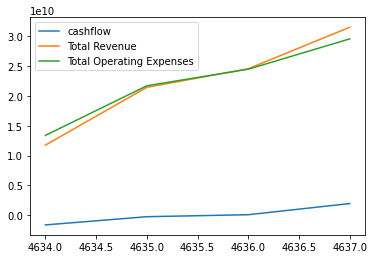

In [131]:
tesla[['cashflow','Total Revenue','Total Operating Expenses']].plot()

In [ ]:
tesla = financials[financials.ticker=='TSLA']

<AxesSubplot:>

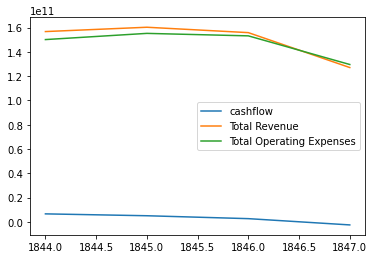

In [144]:
ford = financials[financials.ticker=='F']
ford[['cashflow','Total Revenue','Total Operating Expenses']].plot()

In [83]:
data_dict['F']

{'info': {'zip': '48126-1899',
  'sector': 'Consumer Cyclical',
  'fullTimeEmployees': 182000,
  'longBusinessSummary': 'Ford Motor Company designs, manufactures, markets, and services a range of Ford trucks, cars, sport utility vehicles, electrified vehicles, and Lincoln luxury vehicles worldwide. It operates through three segments: Automotive, Mobility, and Ford Credit. The Automotive segment sells Ford and Lincoln vehicles, service parts, and accessories through distributors and dealers, as well as through dealerships to commercial fleet customers, daily rental car companies, and governments. The Mobility segment designs and builds mobility services; and provides self-driving systems development services. The Ford Credit segment primarily engages in vehicle-related financing and leasing activities to and through automotive dealers. It provides retail installment sale contracts for new and used vehicles; and direct financing leases for new vehicles to retail and commercial customers,

In [81]:
financials[financials.ticker.str.contains('F')].ticker

172      AFL
173      AFL
174      AFL
175      AFL
374      ANF
        ... 
4993     WFC
5046    WTFC
5047    WTFC
5048    WTFC
5049    WTFC
Name: ticker, Length: 374, dtype: object

<AxesSubplot:xlabel='quarter'>

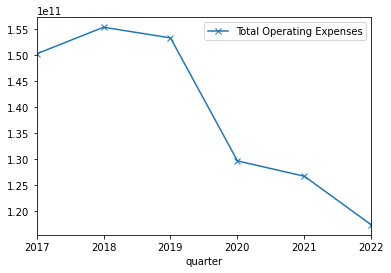

In [173]:
from matplotlib.dates import date2num
import numpy as np

def calc_trend(datetimes,values):
    ''' fits second order polynomial and returns coefs. '''
    if isinstance(datetimes,str):
        datetimes = pd.to_datetime(datetimes)
    datetimes_numeric = date2num(datetimes)
    coefs = np.polyfit(datetimes_numeric,values,1)
    return [coefs[0],coefs[1]]

def calc_forward(dates,coefs,h,name):
    new_dates = [pd.Timestamp((dates.iloc[-1] + np.timedelta64(x+1, 'Y')).date()) for x in range(h)]
    new_dates_num = [date2num(x) for x in new_dates]
    
    new_values = [coefs[0]*t+coefs[1] for t in new_dates_num]
    
    return pd.DataFrame({'quarter':new_dates,f'{name}':new_values})
    
    


class Forecaster:
    def __init__(self,outlook=0.0,data=None):
        self._outlook = outlook
        
        if data is None:
            raise Exception('no data provided!')
        elif not isinstance(data,pd.DataFrame):
            raise Exception('data must be pandas dataframe')
        elif isinstance(data,pd.DataFrame):
            self._data = data.copy()
        
    def forecast(self,linear=False):
        
        dates,total_revenue = self._data['quarter'],self._data['Total Revenue']
        dates,total_operating_expense = self._data['quarter'],self._data['Total Operating Expenses']
        dates,cashflow = self._data['quarter'],self._data['cashflow']
        
        total_revenue_coefs = calc_trend(dates,total_revenue)
        total_operating_expense_coefs = calc_trend(dates,total_revenue)
        cashflow_coefs = calc_trend(dates,total_revenue)
        
        data = self._data.copy()
        data['is_forecast'] = False
        
        new_data = calc_forward(dates,total_revenue_coefs,2,'Total Operating Expenses')
        new_data['is_forecast'] = True
        return pd.concat([data,new_data],axis=0,ignore_index=True)
        
a = Forecaster(data=ford)
a.forecast()[['quarter','Total Operating Expenses']].set_index('quarter').plot(marker='x')

In [172]:
a.forecast()[['quarter','Total Operating Expenses']]

,quarter,Total Operating Expenses
0,2017-12-31,1.501800e+11
1,2018-12-31,1.552840e+11
2,2019-12-31,1.532420e+11
3,2020-12-31,1.296490e+11
4,2021-12-31,1.266938e+11
5,2022-12-31,1.173632e+11


In [174]:
ford

,ticker,quarter,Research Development,Effect Of Accounting Charges,Income Before Tax,Minority Interest,Net Income,Selling General Administrative,Gross Profit,Ebit,...,Cost Of Revenue,Total Other Income Expense Net,Discontinued Operations,Net Income From Continuing Ops,Net Income Applicable To Common Shares,floatShares,cashflow,income,EPS,nEPS
1844,F,2017-12-31,NaN,NaN,8.159000e+09,126000000.0,7.731000e+09,9.962000e+09,1.655800e+10,6.596000e+09,...,1.402180e+11,1.563000e+09,NaN,7.757000e+09,7.731000e+09,3.913471e+09,6.596000e+09,-1.424490e+11,-36.399657,1.975484
1845,F,2018-12-31,NaN,NaN,4.345000e+09,134000000.0,3.677000e+09,9.781000e+09,1.483500e+10,5.054000e+09,...,1.455030e+11,-7.090000e+08,NaN,3.695000e+09,3.677000e+09,3.913471e+09,5.054000e+09,-1.516070e+11,-38.739779,0.939575
1846,F,2019-12-31,NaN,NaN,-6.400000e+08,45000000.0,4.700000e+07,1.021800e+10,1.287600e+10,2.658000e+09,...,1.430240e+11,-3.298000e+09,NaN,8.400000e+07,4.700000e+07,3.913471e+09,2.658000e+09,-1.531950e+11,-39.145557,0.012010
1847,F,2020-12-31,NaN,NaN,-1.116000e+09,121000000.0,-1.279000e+09,8.628000e+09,6.123000e+09,-2.505000e+09,...,1.210210e+11,1.389000e+09,NaN,-1.276000e+09,-1.279000e+09,3.913471e+09,-2.505000e+09,-1.309280e+11,-33.455723,-0.326820


In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
import pickle

with open('ticker_files_24012022.pkl','wb') as file:
    pickle.dump(tickers,file)

In [13]:
with open('ticker_files_24012022.pkl','rb') as file:
    tickers_read = pickle.load(file)

In [15]:
data_dict = dict()
for val in tickers_read:
    if val is not None:
        data_dict.update(val)

In [16]:
def process_ticker(info,ticker_history,financials,balance_sheet):
    
    ticker_history = pd.DataFrame.from_dict(ticker_history)
    financials = pd.DataFrame.from_dict(financials).T
    balance_sheet = pd.DataFrame.from_dict(balance_sheet).T
    
    ticker_history_bool = (len(ticker_history)>0)&(ticker_history.shape[1]>0)
    financials_bool = (len(financials)>0)&(financials.shape[1]>0)
    balance_sheet_bool = (len(balance_sheet)>0)&(balance_sheet.shape[1]>0)
    
    if any([ticker_history_bool,financials_bool,balance_sheet_bool]):
        return None
    else:
        today = pd.Timestamp('2021-03-31')
        origin = today - pd.Timedelta('90days')
        today_tm30 = today - pd.Timedelta('30days')
        origin_tm30 = origin  - pd.Timedelta('30days')
        #ticker = yf.Ticker(index)

        # Getting growth
        orig_price = ticker_history[(ticker_history.index>=origin_tm30)&(ticker_history.index<origin)]
        orig_index = orig_price.index.max()
        orig_price = orig_price.loc[[orig_index]]['Close']

        today_price = ticker_history[(ticker_history.index>=today_tm30)&(ticker_history.index<today)]
        today_index = today_price.index.max()
        today_price = today_price.loc[[today_index]]['Close']
        growth = (today_price[0]-orig_price[0])/orig_price[0]

        # Fetch nearest financials under the condition that the financial pre-date the stock prices
        origin_financials = financials[financials.index<=orig_index].sort_index().iloc[[-1]]
        origin_balance_sheet = balance_sheet[balance_sheet.index<=orig_index].sort_index().iloc[[-1]]


        origin_financials['growth'] = growth
        origin_financials['orig_price'] = orig_price[0]
        origin_financials['orig_date'] = orig_index
        origin_financials['outcome_date'] = today
        origin_financials['today_price'] = today_price[0]
        origin_financials['obsdate'] = origin
        origin_financials['stonk'] = index
        origin_financials['financials_date'] = origin_financials.index

        #origin_financials['orig_EPS'] = origin_financials['Net Income Applicable To Common Shares']/origin
        #origin_financials['orig_PE'] = 0

        #origin_financials = origin_financials.join(origin_balance_sheet)
        return origin_financials.join(origin_balance_sheet)

In [17]:
process_list = list()
funny_list = list()
for k,v in tqdm(data_dict.items()):
    
    if isinstance(v,dict):
        process_list.append(process_ticker(v['info'],v['history'],v['financials'],v['balance_sheet']))
    else:
        funny_list.append(k)

100%|██████████████████████████████████████████████████████████████████████████████| 1413/1413 [01:51<00:00, 12.72it/s]


In [18]:
from collections import defaultdict
fund_val = defaultdict(list)

def get_value(key,data_dict):
    if key in data_dict:
        return data_dict[key]
    else:
        return np.nan
    
data_points = ['circulatingSupply',
    'floatShares',
               'grossProfits',
    'shortName',
               'sector',
    'sharesOutstanding',
    'totalCashPerShare',
    'sharesShort',
    'shortRatio', 
    'sharesShortPreviousMonthDate',
    'marketCap',
    'revenuePerShare',
    'currentPrice']

data_points = [x for x in data_dict['BABA']['info'].keys()]

for ticker,ticker_data in data_dict.items():
        
    fund_val['ticker'].append(ticker)
    for col in data_points:
        fund_val[col].append(get_value(col,ticker_data['info']))

rps = pd.DataFrame(fund_val).set_index('ticker')
rps['revenue_per_share_price_ratio'] = rps['revenuePerShare']/rps['currentPrice']
rps['grossProfits_per_share_price_ratio'] = (rps['grossProfits']/rps['sharesOutstanding'])/rps['currentPrice']
rps.head()

,zip,sector,fullTimeEmployees,longBusinessSummary,city,phone,country,companyOfficers,website,maxAge,...,fiftyTwoWeekLow,bid,tradeable,dividendYield,bidSize,dayHigh,regularMarketPrice,logo_url,revenue_per_share_price_ratio,grossProfits_per_share_price_ratio
ticker,,,,,,,,,,,,,,,,,,,,,
A,95051,Healthcare,17000.0,"Agilent Technologies, Inc. provides applicatio...",Santa Clara,800 227 9770,United States,[],https://www.agilent.com,1,...,112.47,137.30,False,0.0056,800.0,136.3800,134.490,https://logo.clearbit.com/agilent.com,0.154554,0.083883
AA,15212-5858,Basic Materials,12900.0,"Alcoa Corporation, together with its subsidiar...",Pittsburgh,412-315-2900,United States,[],https://www.alcoa.com,1,...,17.30,56.21,False,0.0066,800.0,55.6750,55.520,https://logo.clearbit.com/alcoa.com,1.080602,0.131113
AAL,76155,Industrials,119800.0,"American Airlines Group Inc., through its subs...",Fort Worth,817 963 1234,United States,[],https://www.aa.com,1,...,15.02,16.28,False,NaN,40700.0,16.2215,15.975,https://logo.clearbit.com/aa.com,2.452833,-0.535188
AAN,30339-3194,Consumer Cyclical,9400.0,The Aarons Company Inc. provides lease-to-own ...,Atlanta,678 402 3000,United States,[],https://www.aarons.com,1,...,16.64,5.00,False,0.0158,800.0,21.3400,21.150,https://logo.clearbit.com/aarons.com,2.574043,1.627258
AAOI,77478,Technology,2682.0,"Applied Optoelectronics, Inc. designs, manufac...",Sugar Land,281 295 1800,United States,[],https://www.ao-inc.com,1,...,3.65,3.83,False,NaN,1300.0,3.7800,3.730,https://logo.clearbit.com/ao-inc.com,2.159786,0.496376


In [20]:
rps.columns.tolist()

['zip',
 'sector',
 'fullTimeEmployees',
 'longBusinessSummary',
 'city',
 'phone',
 'country',
 'companyOfficers',
 'website',
 'maxAge',
 'address1',
 'fax',
 'industry',
 'address2',
 'ebitdaMargins',
 'profitMargins',
 'grossMargins',
 'operatingCashflow',
 'revenueGrowth',
 'operatingMargins',
 'ebitda',
 'targetLowPrice',
 'recommendationKey',
 'grossProfits',
 'freeCashflow',
 'targetMedianPrice',
 'currentPrice',
 'earningsGrowth',
 'currentRatio',
 'returnOnAssets',
 'numberOfAnalystOpinions',
 'targetMeanPrice',
 'debtToEquity',
 'returnOnEquity',
 'targetHighPrice',
 'totalCash',
 'totalDebt',
 'totalRevenue',
 'totalCashPerShare',
 'financialCurrency',
 'revenuePerShare',
 'quickRatio',
 'recommendationMean',
 'exchange',
 'shortName',
 'longName',
 'exchangeTimezoneName',
 'exchangeTimezoneShortName',
 'isEsgPopulated',
 'gmtOffSetMilliseconds',
 'underlyingSymbol',
 'quoteType',
 'symbol',
 'underlyingExchangeSymbol',
 'headSymbol',
 'messageBoardId',
 'uuid',
 'market',


In [21]:
rps.to_csv('summary_24012022.csv')

In [54]:
rps[['symbol',
     'shortName',
     'longName',
     'currentPrice',
     'twoHundredDayAverage',
     'fiftyTwoWeekLow',
     '52WeekChange',
     'forwardEps',
     'circulatingSupply',
     'revenue_per_share_price_ratio',
     'grossProfits_per_share_price_ratio',
     'marketCap',
     'floatShares',
     'sharesOutstanding',
     'heldPercentInsiders',
     'sharesShortPreviousMonthDate',
     'sharesShort',
     'shortRatio',
     'shortPercentOfFloat',
     'sharesShortPriorMonth',
     'beta',
     'enterpriseValue',
     'dateShortInterest',
     'trailingPE',
     'maxSupply',
     'ebitdaMargins',
     'profitMargins',
     'grossMargins',
     'operatingCashflow',
     'revenueGrowth',
     'operatingMargins',
     'totalCash',
     'totalDebt',
     'totalRevenue']].to_csv('summary_24012022.csv')

<AxesSubplot:xlabel='grossProfits_per_share_price_ratio', ylabel='currentPrice'>

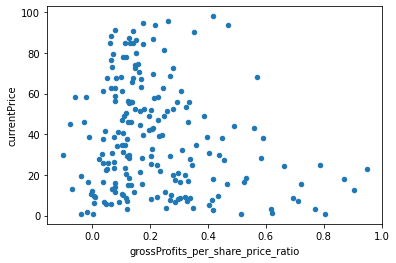

In [151]:
rps[(rps['currentPrice']<100)&(rps['grossProfits_per_share_price_ratio']<1)][['currentPrice',
     'grossProfits_per_share_price_ratio']].sample(200).plot.scatter(x='grossProfits_per_share_price_ratio',y='currentPrice')

0.2==20

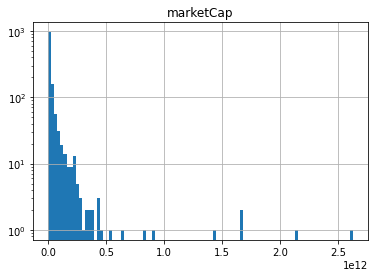

In [55]:
rps[['marketCap']].hist(bins=100)
plt.yscale('log')

In [56]:
rps['marketCap'].describe(np.arange(0,1,0.05))

count    1.291000e+03
mean     3.642540e+10
std      1.370154e+11
min      4.470000e+02
0%       4.470000e+02
5%       1.434621e+08
10%      3.595601e+08
15%      7.181806e+08
20%      1.144750e+09
25%      1.620532e+09
30%      2.173545e+09
35%      2.929832e+09
40%      3.814518e+09
45%      4.912721e+09
50%      6.831266e+09
55%      9.184920e+09
60%      1.208995e+10
65%      1.610554e+10
70%      2.179438e+10
75%      2.825085e+10
80%      3.635205e+10
85%      4.814276e+10
90%      7.464595e+10
95%      1.460229e+11
max      2.622727e+12
Name: marketCap, dtype: float64

In [104]:
shorts = rps[['symbol',
     'shortName',
     'longName',
     'currentPrice',
     'twoHundredDayAverage',
     'fiftyTwoWeekLow',
     '52WeekChange',
     'forwardEps',
     'circulatingSupply',
     'revenue_per_share_price_ratio',
     'grossProfits_per_share_price_ratio',
     'marketCap',
     'floatShares',
     'sharesOutstanding',
     'heldPercentInsiders',
     'sharesShortPreviousMonthDate',
     'sharesShort',
     'shortRatio',
     'shortPercentOfFloat',
    'revenueQuarterlyGrowth',
              'revenuePerShare',
     'sharesShortPriorMonth',
     'beta',
     'enterpriseValue',
     'dateShortInterest',
     'trailingPE',
     'maxSupply',
     'ebitdaMargins',
     'profitMargins',
     'grossMargins',
     'operatingCashflow',
     'revenueGrowth',
     'operatingMargins',
     'totalCash',
     'totalDebt',
     'totalRevenue']]

In [105]:
price_dict = {'ARCH':1.96,
'CAR':1.01,
'CPE':4.41,
'DKS':6.23,
'MSTR':-1.32,
'BIG':7.2,
'BGFV':5.08,
'BLMN':4.14,
'OLLI':8.66,
'IRBT':2.4,
'PETS':-1.35,
'FOUR':3.73,
'GEO':0.55,
'SATS':0.62,
'CNK':-3.06,
'GOGO':1.89,
'PAY':5.72,
'VUZI':-2.69,
'SDC':2.05,
'FUV':-10.64,
'RAD':4.44,
'AMC':-7.4,
'INO':-0.51,
'AI':0.24,
'CLVS':-4.09,
'BYND':1.57,
'DMRC':7.71,
'ESPR':5.8,

}

In [106]:
shorts['growth'] = shorts['symbol'].map(price_dict)

<ipython-input-106-a0652b6b60c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shorts['growth'] = shorts['symbol'].map(price_dict)


In [107]:
correlations =shorts[~shorts['growth'].isna()].corr()[['growth']]
correlations['abs_corr'] = np.abs(correlations)
correlations.sort_values(by=['abs_corr'],ascending=False).head(10)

,growth,abs_corr
growth,1.000000,1.000000
sharesShort,-0.474174,0.474174
sharesShortPriorMonth,-0.470959,0.470959
floatShares,-0.465254,0.465254
grossMargins,0.462509,0.462509
profitMargins,0.405255,0.405255
sharesOutstanding,-0.379680,0.379680
revenueGrowth,-0.349556,0.349556
revenuePerShare,0.300079,0.300079
operatingCashflow,0.288483,0.288483


<AxesSubplot:xlabel='change_in_short_change', ylabel='growth'>

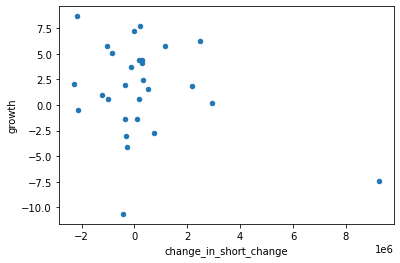

In [123]:
x = shorts[~shorts['growth'].isna()][['shortName',
                                  'longName',
                                  'sharesShortPriorMonth',
                                      'sharesShort',
                                      'growth',
                                      'revenueQuarterlyGrowth',
                                      'revenueGrowth',
                                      'operatingCashflow','ebitdaMargins','revenuePerShare','currentPrice','revenue_per_share_price_ratio','grossProfits_per_share_price_ratio']]
x['change_in_short_change'] = (x['sharesShort'] - x['sharesShortPriorMonth'])
x['pc_in_short_change'] = (x['sharesShort'] - x['sharesShortPriorMonth'])/x['sharesShortPriorMonth']
x.plot.scatter(x='change_in_short_change',y='growth')

<AxesSubplot:>

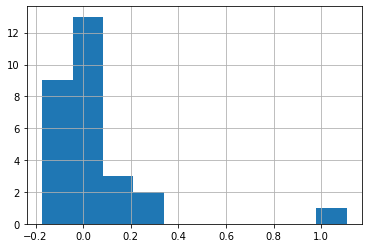

In [124]:
x['pc_in_short_change'].hist()

In [125]:
correlations = x.corr()[['growth']]
correlations['abs_corr'] = np.abs(correlations)
correlations.sort_values(by=['abs_corr'],ascending=False).head(10)

,growth,abs_corr
growth,1.000000,1.000000
sharesShort,-0.474174,0.474174
sharesShortPriorMonth,-0.470959,0.470959
revenueGrowth,-0.349556,0.349556
change_in_short_change,-0.302621,0.302621
revenuePerShare,0.300079,0.300079
operatingCashflow,0.288483,0.288483
ebitdaMargins,0.285899,0.285899
grossProfits_per_share_price_ratio,0.222883,0.222883
revenue_per_share_price_ratio,0.174194,0.174194


In [126]:
x.loc['AMC']

shortName                              AMC Entertainment Holdings, Inc
longName                              AMC Entertainment Holdings, Inc.
sharesShortPriorMonth                                      8.74623e+07
sharesShort                                                9.67002e+07
growth                                                            -7.4
revenueQuarterlyGrowth                                             NaN
revenueGrowth                                                    5.387
operatingCashflow                                          -1.0185e+09
ebitdaMargins                                                 -0.58148
revenuePerShare                                                  3.924
currentPrice                                                   16.0665
revenue_per_share_price_ratio                                 0.244235
grossProfits_per_share_price_ratio                           -0.107355
change_in_short_change                                     9.23794e+06
pc_in_

In [153]:
x['market_value'] = x['grossProfits_per_share_price_ratio']*100
x[(x['pc_in_short_change']>0)&(x['pc_in_short_change']<0.2)].sort_values(by='grossProfits_per_share_price_ratio')

,shortName,longName,sharesShortPriorMonth,sharesShort,growth,revenueQuarterlyGrowth,revenueGrowth,operatingCashflow,ebitdaMargins,revenuePerShare,currentPrice,revenue_per_share_price_ratio,grossProfits_per_share_price_ratio,change_in_short_change,pc_in_short_change,market_value
ticker,,,,,,,,,,,,,,,,
AMC,"AMC Entertainment Holdings, Inc","AMC Entertainment Holdings, Inc.",87462304.0,96700247.0,-7.40,NaN,5.387,-1.018500e+09,-0.58148,3.924,16.0665,0.244235,-0.107355,9237943.0,0.105622,-10.735483
VUZI,Vuzix Corporation,Vuzix Corporation,12979819.0,13715595.0,-2.69,NaN,0.086,-2.161360e+07,-1.84650,0.252,6.2100,0.040580,0.004878,735776.0,0.056686,0.487814
DMRC,Digimarc Corporation,Digimarc Corporation,1922411.0,2133940.0,7.71,NaN,0.116,-2.357800e+07,-1.20290,1.547,30.2550,0.051132,0.031343,211529.0,0.110033,3.134312
BYND,"Beyond Meat, Inc.","Beyond Meat, Inc.",20315093.0,20820404.0,1.57,NaN,0.127,-1.883050e+08,-0.19180,7.392,57.7900,0.127911,0.036524,505311.0,0.024874,3.652435
MSTR,MicroStrategy Incorporated,MicroStrategy Incorporated,1701824.0,1787188.0,-1.32,NaN,0.005,1.159080e+08,0.15062,52.328,340.0900,0.153865,0.123843,85364.0,0.050160,12.384277
GOGO,Gogo Inc.,Gogo Inc.,14678589.0,16859126.0,1.89,NaN,0.310,-6.144700e+07,0.37336,3.319,11.8000,0.281271,0.142853,2180537.0,0.148552,14.285327
BLMN,"Bloomin' Brands, Inc.","Bloomin' Brands, Inc.",15810898.0,16117598.0,4.14,NaN,0.310,3.881240e+08,0.10016,43.885,19.2300,2.282111,0.222553,306700.0,0.019398,22.255342
CPE,Callon Petroleum Company,Callon Petroleum Company,7455073.0,7739760.0,4.41,NaN,0.905,7.424110e+08,0.27328,37.674,46.5300,0.809671,0.226720,284687.0,0.038187,22.671984
IRBT,iRobot Corporation,iRobot Corporation,6628049.0,6945049.0,2.40,NaN,0.067,4.452700e+07,0.06131,59.126,62.5300,0.945562,0.398735,317000.0,0.047827,39.873525


In [ ]:
0.2==20

In [152]:
0.2*100

20.0

In [134]:
Stonks to buy
- bloomin brands :BLMN
- robot corporation: IRBT
- rite aid: RAD
- callon petroleum: CPE
- echostar: SATS
- Gogo Inc.: GOGO

SyntaxError: invalid syntax (<ipython-input-134-14970ab06d7e>, line 1)

<AxesSubplot:xlabel='quarter'>

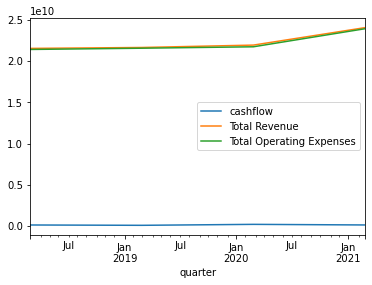

In [137]:
ford = financials[financials.ticker=='RAD'].set_index('quarter')
ford[['cashflow','Total Revenue','Total Operating Expenses']].plot()

<AxesSubplot:xlabel='quarter'>

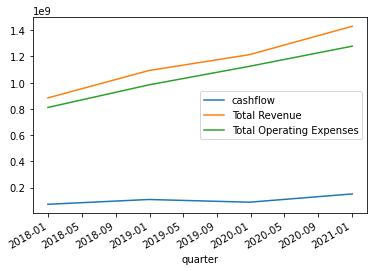

In [138]:
ford = financials[financials.ticker=='IRBT'].set_index('quarter')
ford[['cashflow','Total Revenue','Total Operating Expenses']].plot()

<AxesSubplot:xlabel='quarter'>

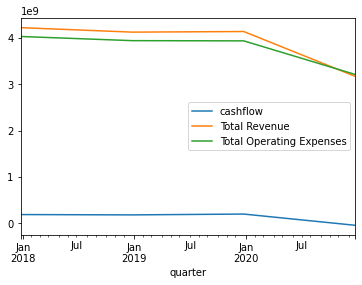

In [139]:
ford = financials[financials.ticker=='BLMN'].set_index('quarter')
ford[['cashflow','Total Revenue','Total Operating Expenses']].plot()

<AxesSubplot:xlabel='quarter'>

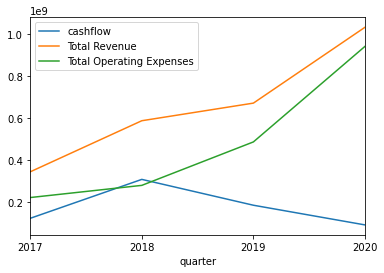

In [140]:
ford = financials[financials.ticker=='CPE'].set_index('quarter')
ford[['cashflow','Total Revenue','Total Operating Expenses']].plot()

<AxesSubplot:xlabel='quarter'>

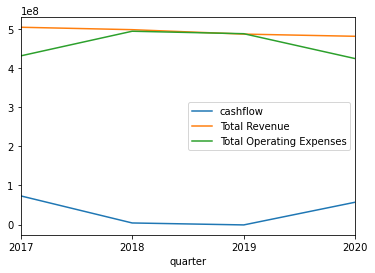

In [141]:
ford = financials[financials.ticker=='MSTR'].set_index('quarter')
ford[['cashflow','Total Revenue','Total Operating Expenses']].plot()

<AxesSubplot:xlabel='quarter'>

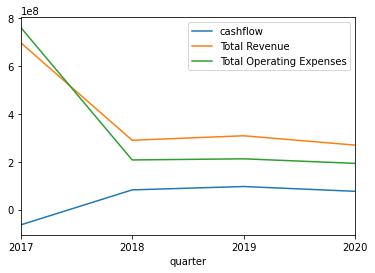

In [154]:
ford = financials[financials.ticker=='GOGO'].set_index('quarter')
ford[['cashflow','Total Revenue','Total Operating Expenses']].plot()

<AxesSubplot:xlabel='quarter'>

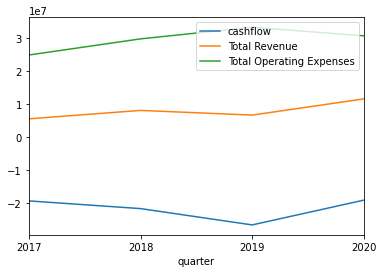

In [156]:
ford = financials[financials.ticker=='VUZI'].set_index('quarter')
ford[['cashflow','Total Revenue','Total Operating Expenses']].plot()

In [ ]:
DMRC